In [38]:
library(tidyverse)
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 200)
theme_set(theme_classic(25))

In [49]:
colz <- read_delim(pipe("cat ../dfe_and_alpha_slim/simout/allsims.txt | head -n1"), delim = "\t") %>% names()
dfe_df <- read_delim(pipe("cat ../dfe_and_alpha_slim/simout/allsims.txt | grep -v n"), delim = "\t", col_names = colz) %>% 
    mutate(fixed = as.numeric(fixed), alpha = as.numeric(alpha))
head(dfe_df)


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  n = col_character(),
  sfs_neutral = col_character(),
  sfs_selected = col_character(),
  alpha = col_character(),
  fixed = col_character(),
  mu = col_character(),
  c = col_character(),
  loci = col_character(),
  neg_mean = col_character(),
  neg_shape = col_character(),
  pos_mean = col_character(),
  pos_shape = col_character(),
  neg_prop = col_character(),
  N_A = col_character(),
  N_B = col_character(),
  N_0 = col_character(),
  T_B = col_character(),
  T_0 = col_character()
)



── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  n = col_double(),
  sfs_neutral = col_character(),
  sfs_selected = col_character(),
  alpha = col_character(),
  fixed = col_chara

n,sfs_neutral,sfs_selected,alpha,fixed,mu,c,loci,neg_mean,neg_shape,pos_mean,pos_shape,neg_prop,N_A,N_B,N_0,T_B,T_0
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,"705,213,80,47,29,32,31,23,20,22,18,389","2436,716,303,171,126,95,104,70,80,76,52,1269",0.3331190,1558,3e-06,1e-06,2e+07,-0.00394465,3.51226,0.00563976,7.81495,0.769375,116,556,1502,107,64
20,"983,269,113,66,42,30,24,23,16,25,13,28,13,10,13,8,6,12,16,385","3518,861,359,238,165,118,96,88,69,53,52,48,45,41,45,27,42,51,48,1231",0.3331190,1558,3e-06,1e-06,2e+07,-0.00394465,3.51226,0.00563976,7.81495,0.769375,116,556,1502,107,64
100,"1786,655,333,206,122,94,77,52,40,35,32,19,23,14,27,16,18,13,14,14,10,11,9,9,11,11,5,4,5,3,6,6,7,8,3,4,11,2,4,4,4,3,8,1,12,0,2,3,4,2,3,1,6,6,4,6,1,2,4,2,0,6,4,3,2,4,8,3,4,3,0,1,1,4,3,0,3,0,2,3,1,1,2,2,0,3,1,5,1,2,4,5,5,1,1,2,1,6,2,372","6590,2195,1140,663,470,278,249,210,145,141,122,109,85,47,65,66,40,38,52,39,34,39,53,27,32,27,28,30,25,21,26,20,13,24,18,22,18,12,14,19,9,13,16,15,17,13,11,7,13,17,13,9,17,11,11,10,11,8,10,13,10,11,9,11,11,10,5,1,10,8,8,7,7,18,4,9,10,9,5,12,8,10,8,4,10,3,5,9,8,6,4,10,17,7,7,11,10,13,9,1201",0.3331190,1558,3e-06,1e-06,2e+07,-0.00394465,3.51226,0.00563976,7.81495,0.769375,116,556,1502,107,64
110,"1949,691,336,209,133,100,89,64,46,36,35,26,30,17,18,17,14,6,16,15,7,11,10,6,7,12,10,10,10,3,3,7,2,6,5,9,2,11,3,1,11,3,1,4,4,5,7,3,4,4,3,5,2,2,0,3,2,8,2,3,3,3,2,4,4,5,3,4,3,2,4,1,3,3,2,1,2,2,0,0,0,3,3,2,0,2,1,0,3,2,4,1,4,2,3,2,1,3,2,1,1,3,6,3,2,5,1,1,2,372","6830,2365,1107,690,470,354,260,213,180,143,129,94,92,76,72,68,54,43,40,45,40,35,35,27,31,20,24,21,27,17,19,22,34,32,23,14,22,11,18,14,14,17,15,26,10,14,14,18,8,6,15,9,12,8,15,7,8,11,14,11,10,8,13,8,5,11,11,11,11,7,10,8,11,8,6,10,10,5,7,9,5,4,2,5,5,6,10,7,12,11,3,8,6,5,6,4,8,3,8,14,10,12,9,10,5,5,7,12,9,1203",0.3331190,1558,3e-06,1e-06,2e+07,-0.00394465,3.51226,0.00563976,7.81495,0.769375,116,556,1502,107,64
12,"44,18,7,6,5,3,1,4,0,2,1,32","131,38,21,14,15,12,8,13,10,9,7,98",0.0731707,123,3e-06,1e-06,2e+07,-0.00473269,4.67487,0.00325099,3.23352,0.927448,10,1279,209,4,1
20,"66,12,6,2,2,2,2,5,2,4,3,2,0,1,2,1,0,0,1,31","192,32,18,19,11,6,12,9,6,6,10,6,10,7,3,6,2,3,4,95",0.0731707,123,3e-06,1e-06,2e+07,-0.00473269,4.67487,0.00325099,3.23352,0.927448,10,1279,209,4,1


[1] 1359  615  364  244  214  190  126  136  120  127  137 6918

[1] 12

[1] 1359  615  364  244  214  190  126  136  120  127  137

[1]  1  2  3  4  5  6  7  8  9 10 11

[1] 11 10  9  8  7  6  5  4  3  2  1

[1] 1.504203

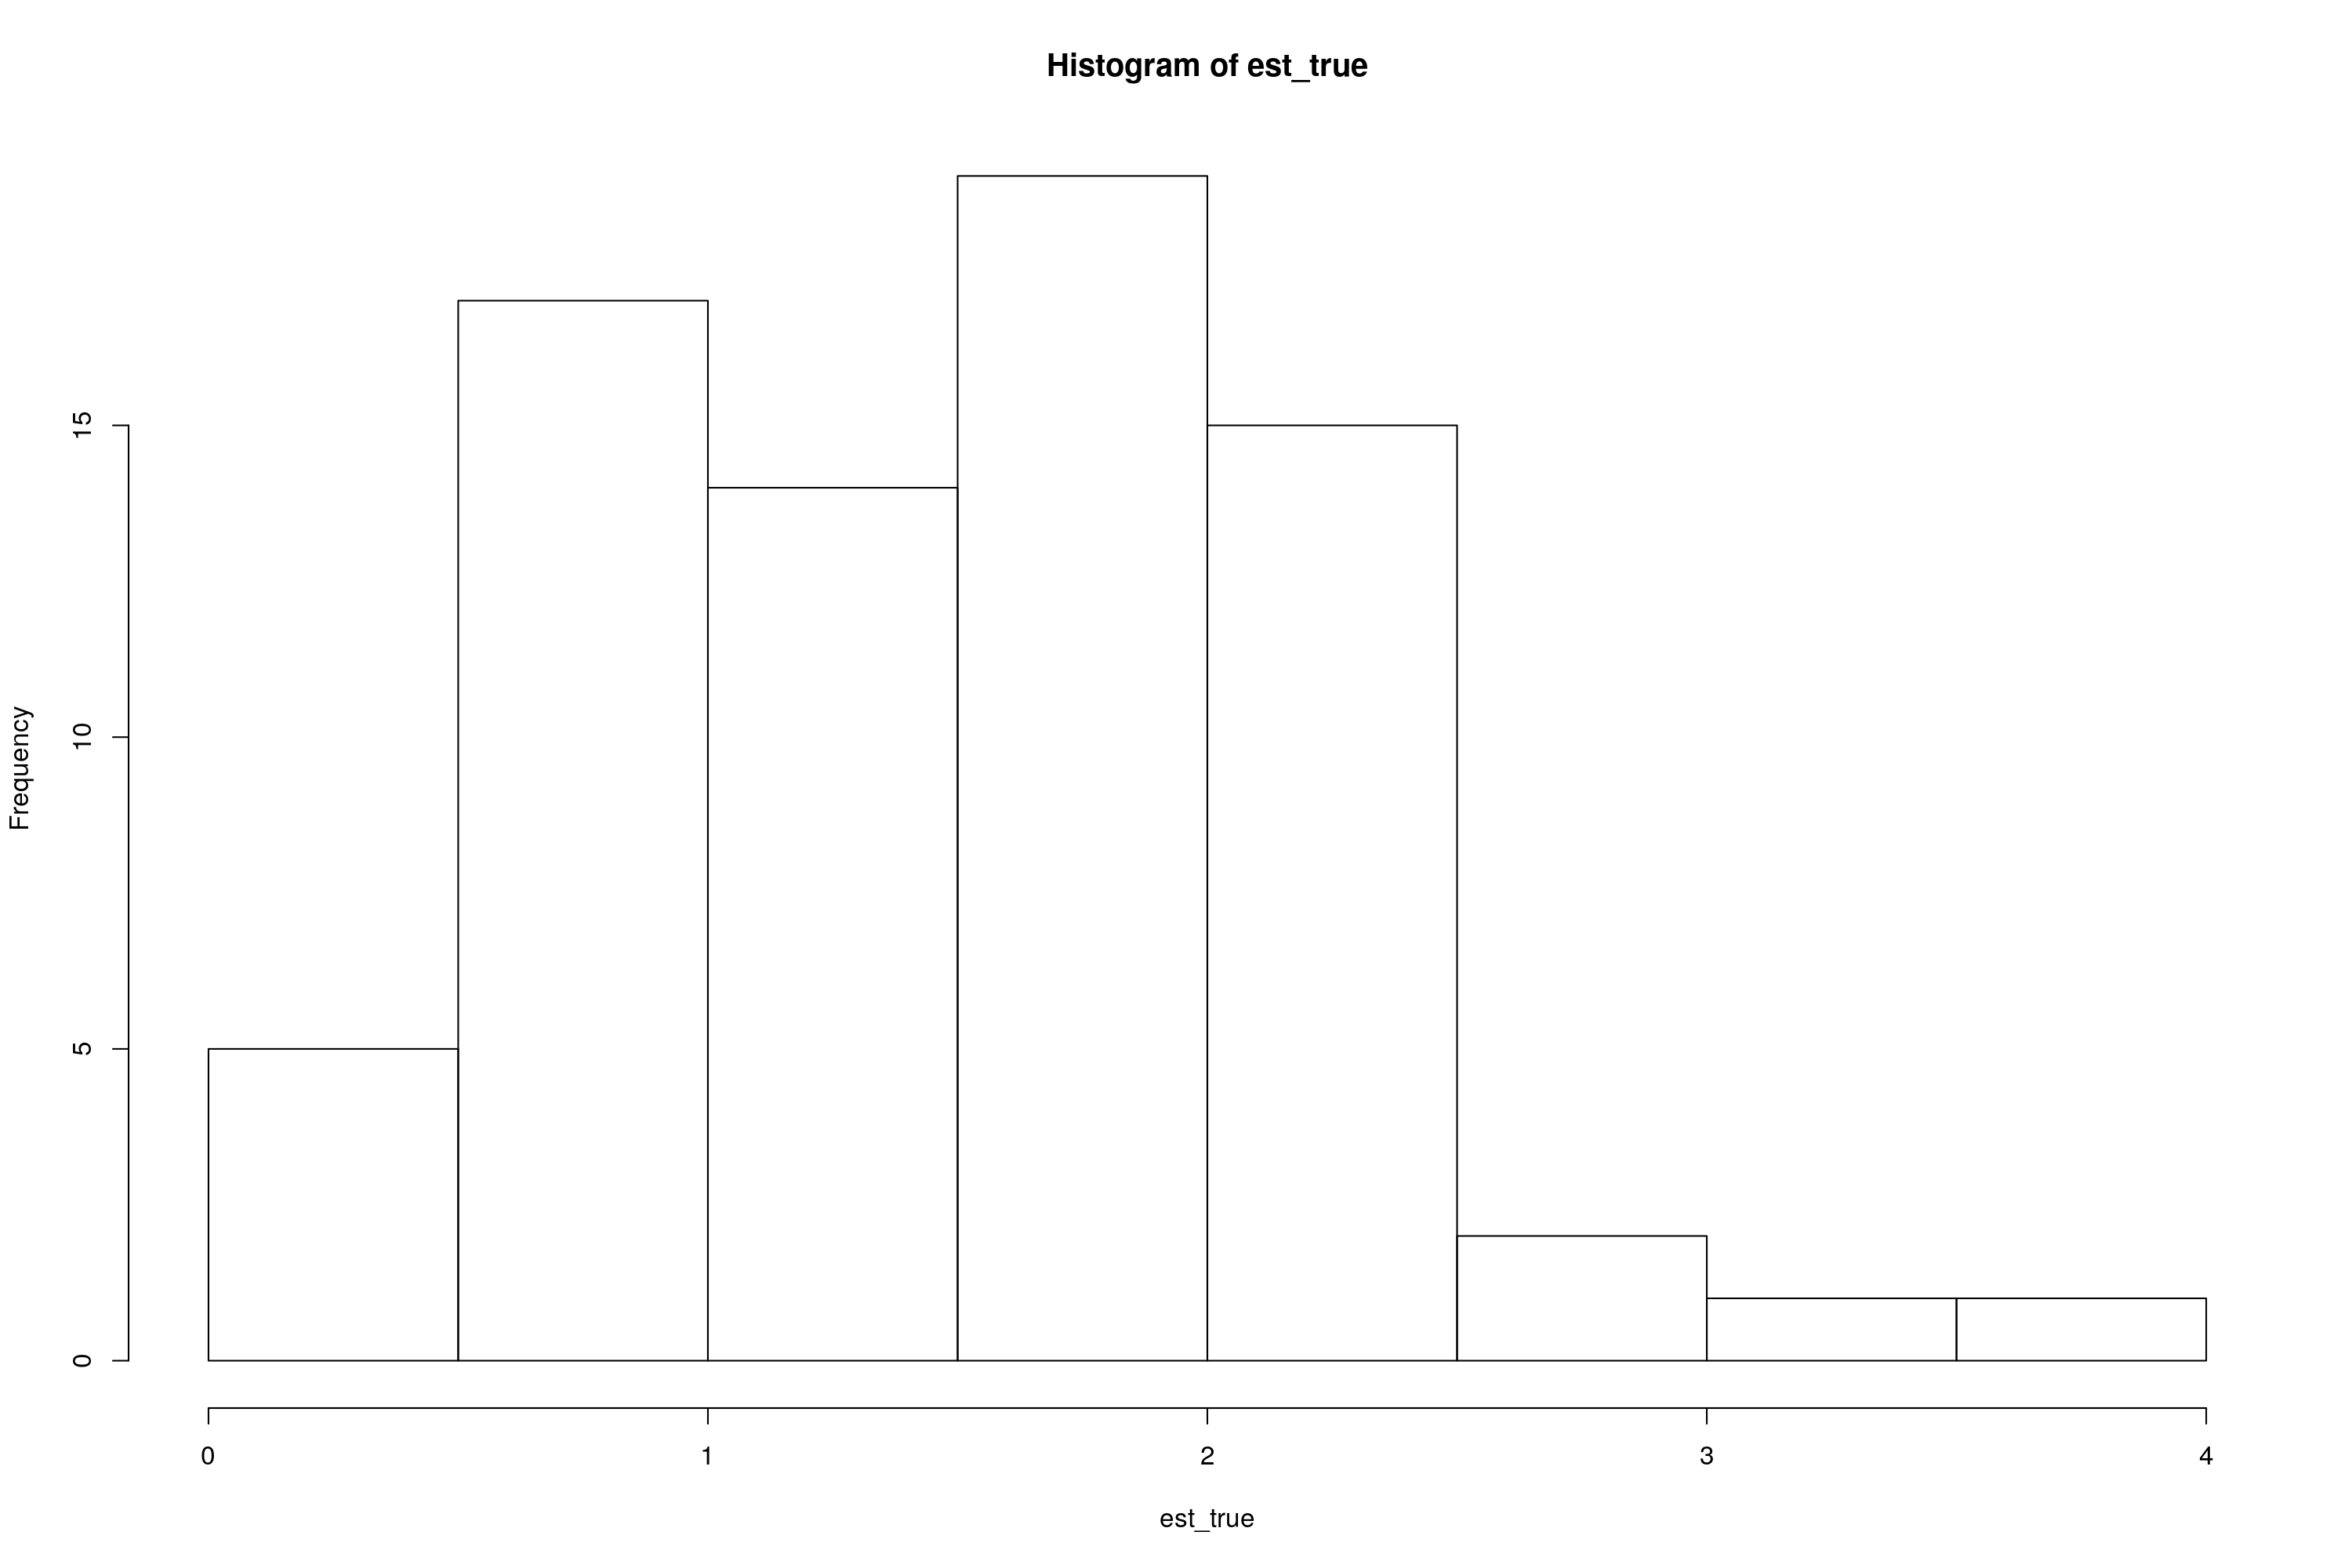

In [337]:
i <- sample(1:nrow(dfe_df), 1)

idx <- dfe_df %>%
    mutate(idx = 1:n()) %>% 
    filter(n == 20) %>% 
    pull(idx)

est_true <- map_dbl(idx, function(i){
    sfs_i <- as.numeric(str_split(dfe_df$sfs_neutral[i], ",", simplify = T))
    n <- length(sfs_i)
    sfs_i <- sfs_i[-c(n)]
    index <- 1:length(sfs_i)
    pi_est <- sum(index*(n-index)*sfs_i) / (choose(n, 2)) / (4*300*200)
    theta_true <- 4*((dfe_df$N_A[i])/3)*dfe_df$mu[i]
    pi_est/theta_true
})


(sfs_i <- as.numeric(str_split(dfe_df$sfs_neutral[i], ",", simplify = T)))
(n <- length(sfs_i))
(sfs_i <- sfs_i[-c(n)])
(index <- 1:length(sfs_i))
n-index

hist(est_true)
median(est_true)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 18 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 18 rows containing missing values (geom_point).”


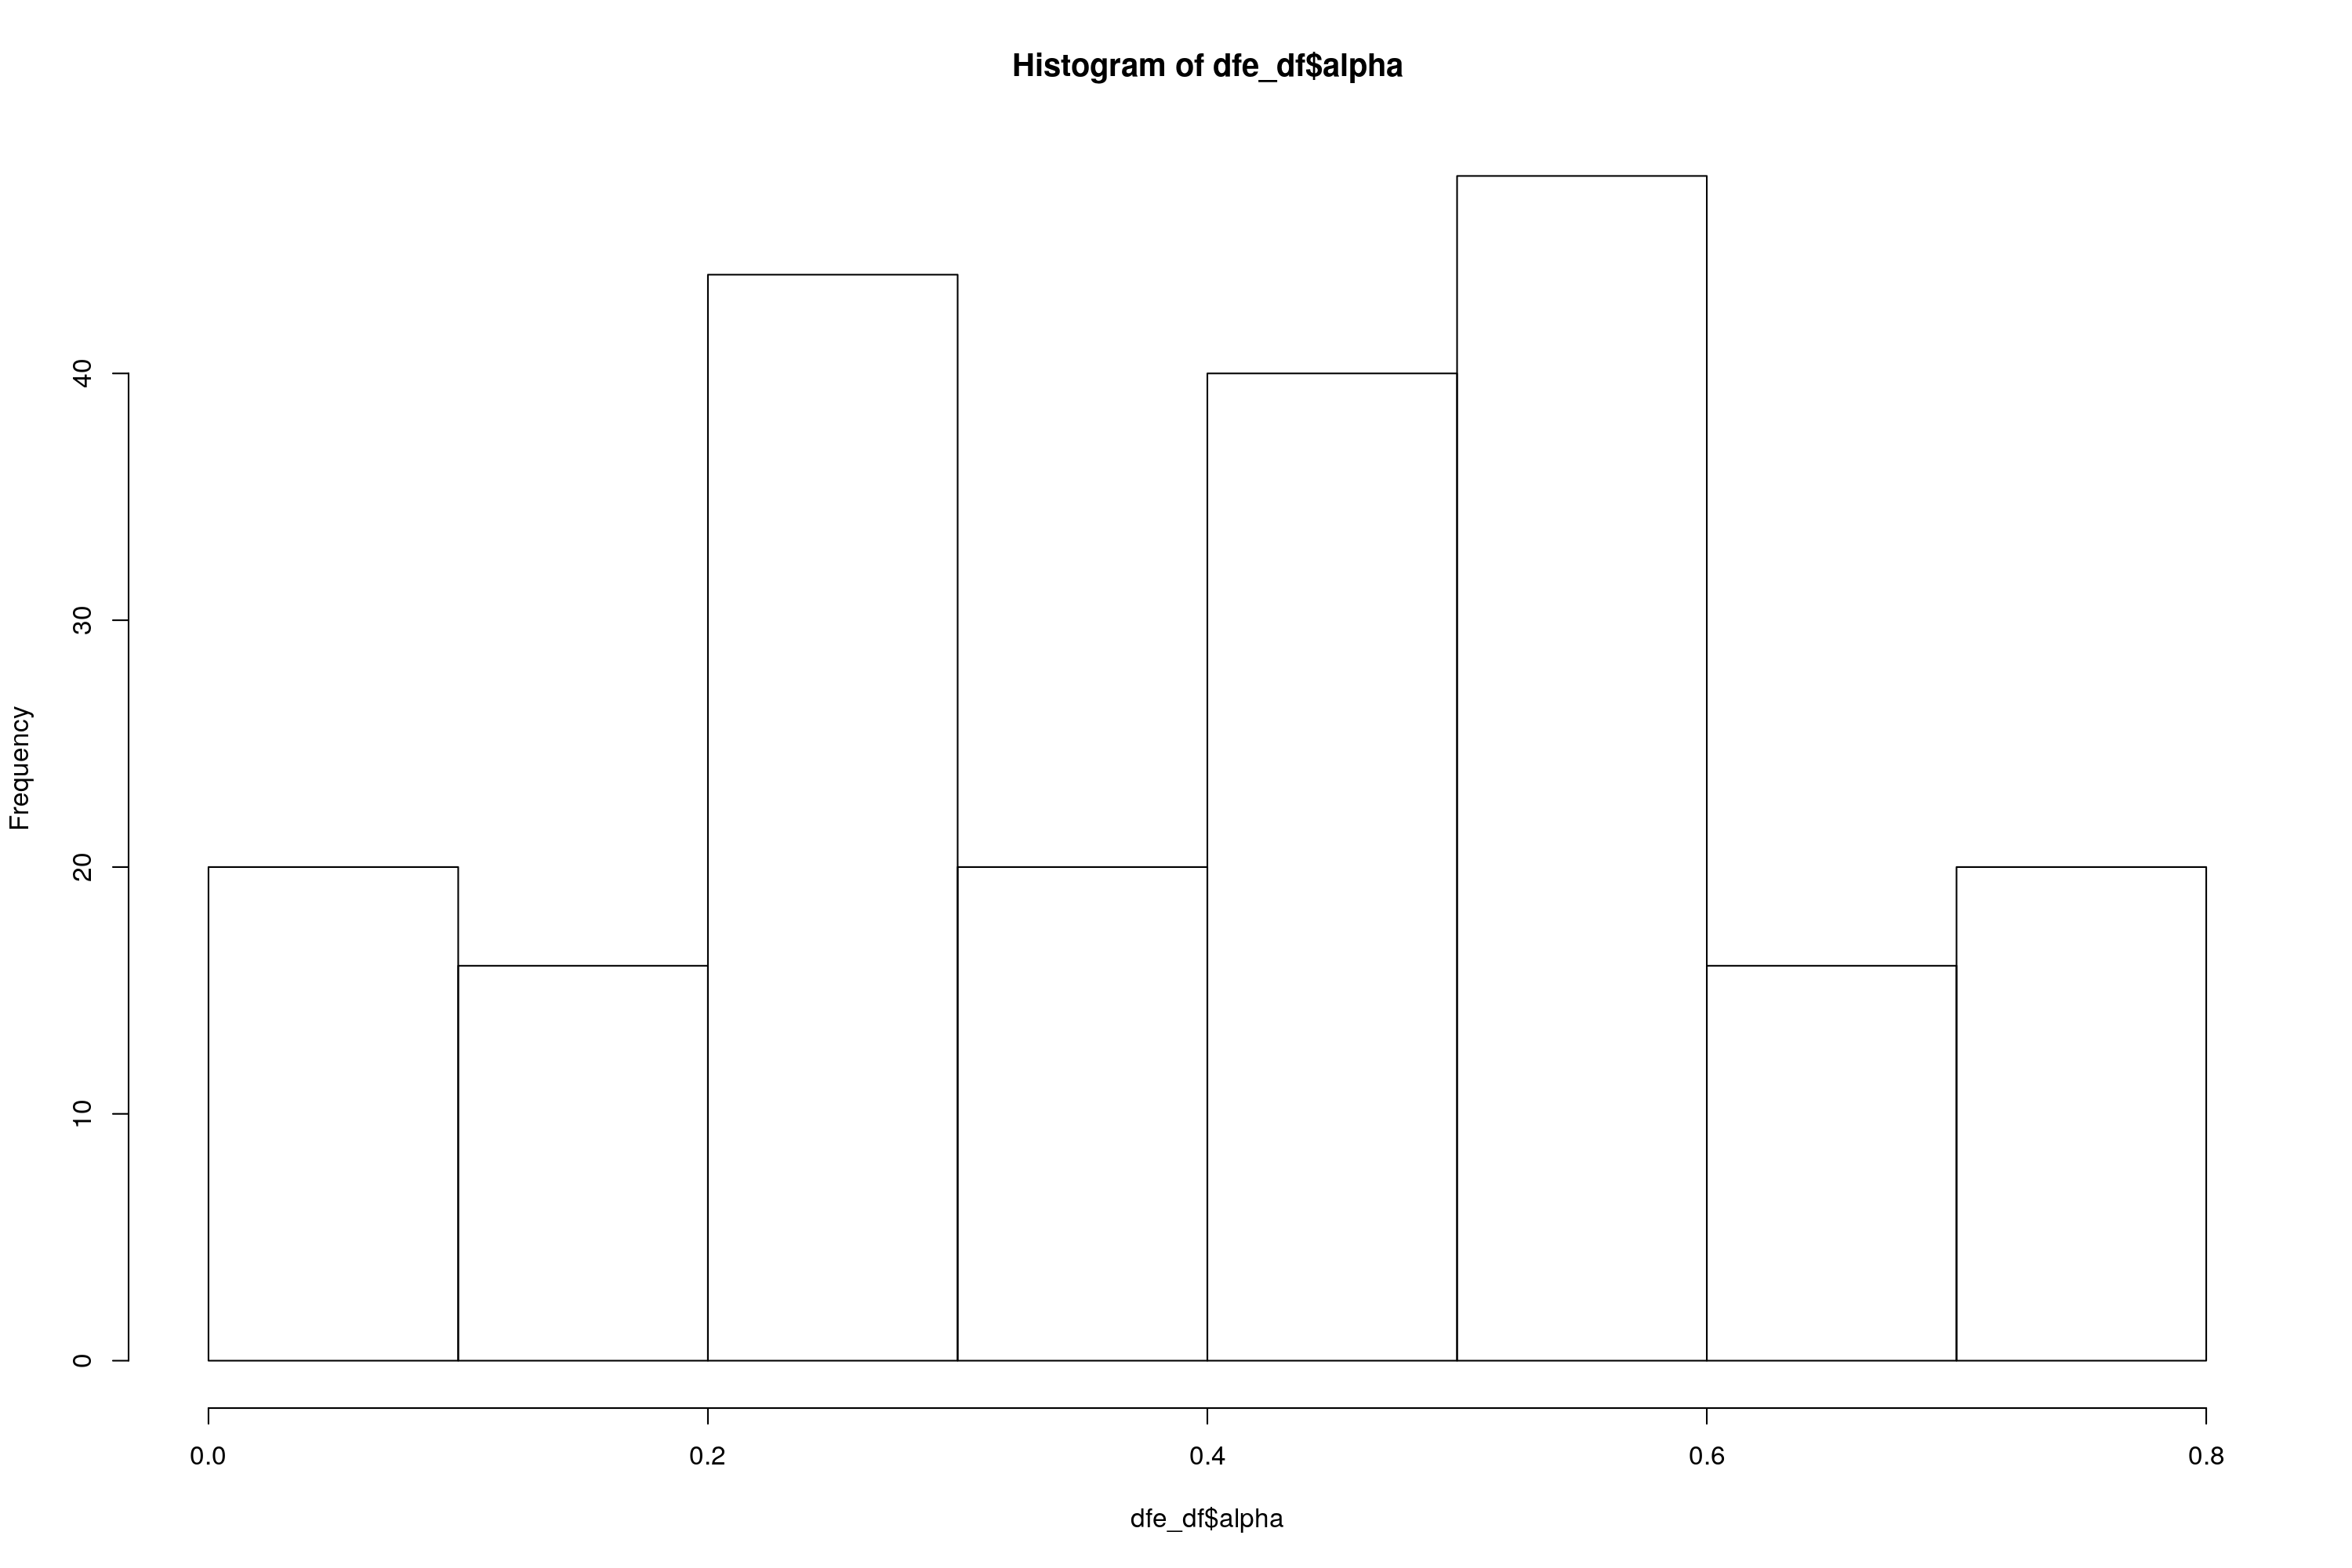

n,sfs_neutral,sfs_selected,alpha,fixed,mu,c,loci,neg_mean,neg_shape,pos_mean,pos_shape,neg_prop,N_A,N_B,N_0,T_B,T_0
"<dbl[,1]>",<chr>,<chr>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
NaN,"983,269,113,66,42,30,24,23,16,25,13,28,13,10,13,8,6,12,16,385","3518,861,359,238,165,118,96,88,69,53,52,48,45,41,45,27,42,51,48,1231",-0.3389163,-0.7549797,NaN,NaN,NaN,0.357353129,-0.56833293,0.2843307,0.8858774,-1.4925168,-1.339346,-0.8471690,0.84997627,-0.7634863,-0.8826215
NaN,"66,12,6,2,2,2,2,5,2,4,3,2,0,1,2,1,0,0,1,31","192,32,18,19,11,6,12,9,6,6,10,6,10,7,3,6,2,3,4,95",-1.5959667,-0.8810639,NaN,NaN,NaN,0.091857189,-0.13146934,-0.5432261,-0.7024327,0.6010266,-1.535069,0.5200256,-1.63110702,-1.0591069,-1.0289093
NaN,"427,65,19,14,12,9,10,11,8,7,1,7,4,5,4,3,4,4,1,92","1424,167,74,49,40,32,25,23,19,27,15,14,15,10,7,12,10,10,12,358",-1.1914675,-0.8532111,NaN,NaN,NaN,0.922446703,0.03369268,-0.5324207,0.8896944,-0.6333287,-1.492601,1.2423884,0.67727905,-0.9988348,-0.9917568
NaN,"436,72,27,18,17,16,12,9,10,5,7,12,4,3,0,6,5,5,1,107","1578,219,87,48,27,19,29,12,21,16,13,14,6,8,19,10,10,11,5,330",-1.6334444,-0.8542655,NaN,NaN,NaN,-0.438743879,1.46962607,1.6400365,-0.4879633,0.8140058,-1.490754,1.8437271,-0.09793955,-1.0103152,-0.9615705
NaN,"701,198,106,76,43,37,42,33,31,24,26,20,23,14,15,15,24,15,16,432","2249,648,330,240,160,158,115,110,85,76,65,71,60,55,47,44,49,45,41,1316",NaN,-0.8918711,NaN,NaN,NaN,0.458994505,-1.38430562,-0.4736963,-0.6366944,-1.0046153,-1.287645,-0.9908852,-0.56422202,-0.9041214,-0.9685365
NaN,"768,334,167,133,72,58,50,40,36,27,36,41,30,27,25,18,13,24,22,656","2405,872,463,298,202,141,118,95,69,56,63,45,43,36,39,42,40,35,34,1296",NaN,-0.8918711,NaN,NaN,NaN,-0.008722931,0.09556174,1.3223267,0.8932097,0.9939542,-1.197170,-0.3782004,-1.05544965,-0.8840306,-0.7990285


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 18 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 18 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 18 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 18 rows containing missing values (geom_point).”


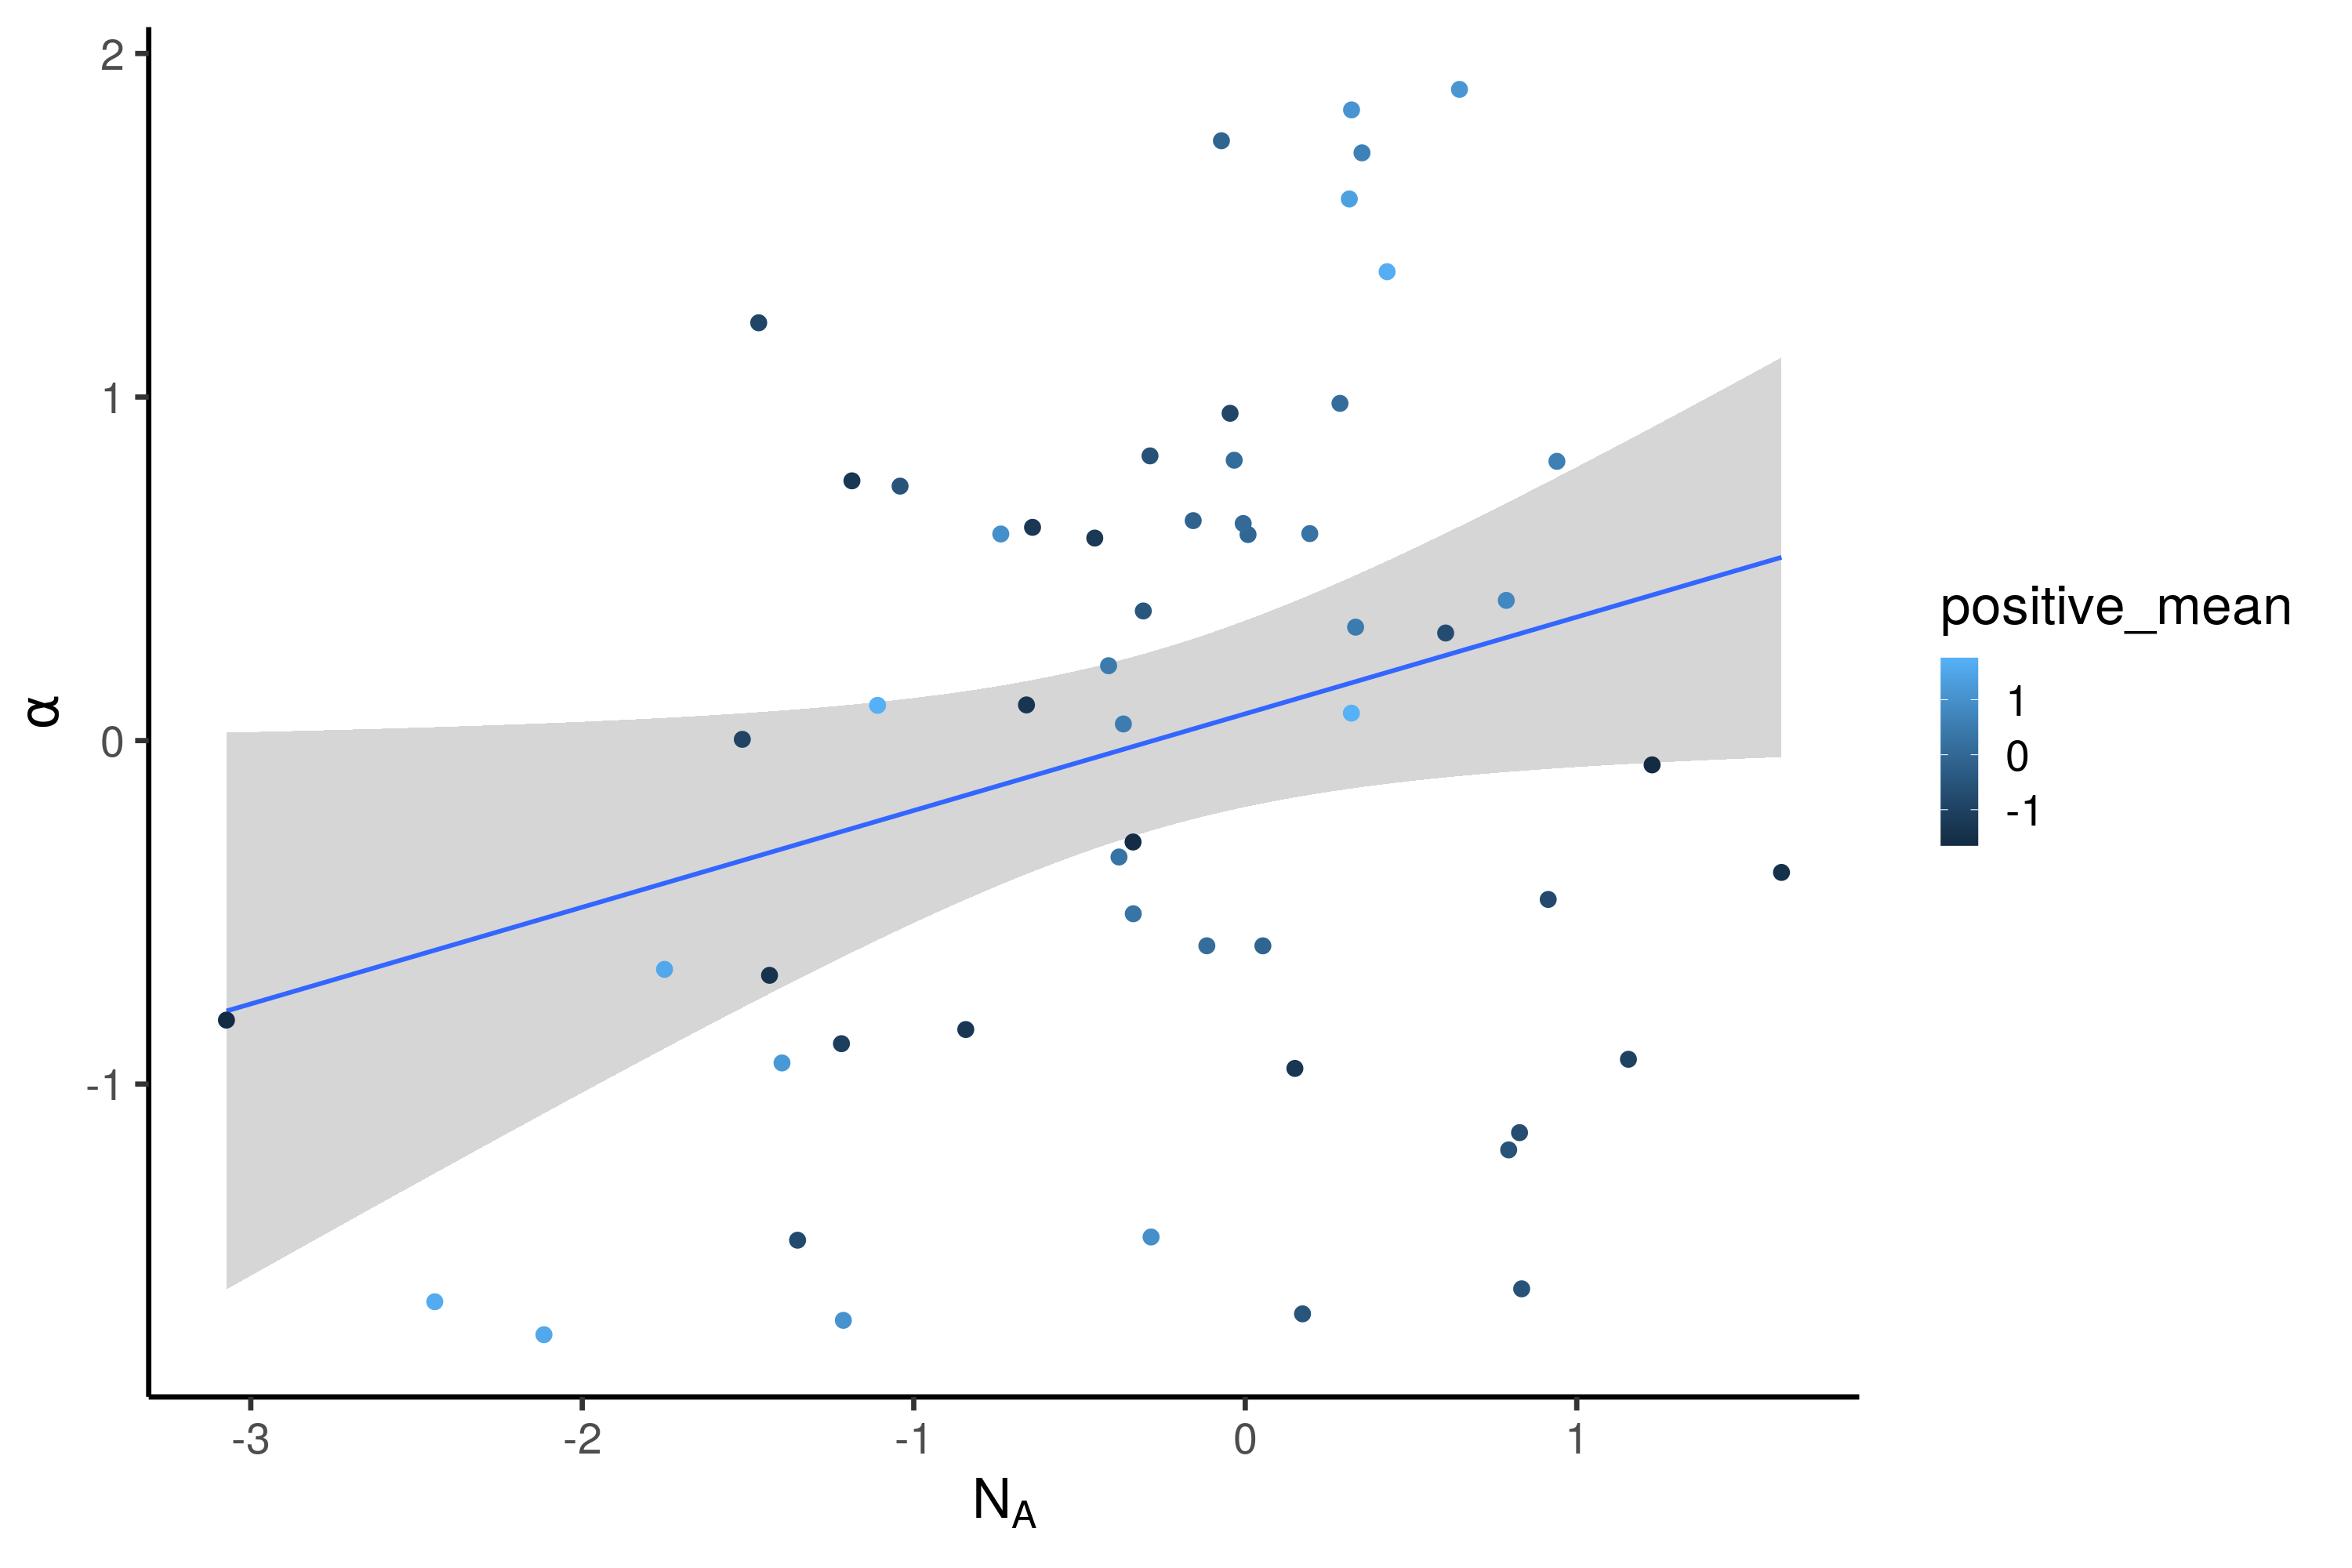

% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Wed May 26 09:21:08 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & -0.009 & 0.059 & -0.154 & 0.878 \\ 
  N\_A & 0.493 & 0.106 & 4.644 & 2.98e-05 \\ 
  N\_B & 0.046 & 0.064 & 0.722 & 0.474 \\ 
  N\_0 & 0.042 & 0.059 & 0.702 & 0.486 \\ 
  T\_B & 0.099 & 0.077 & 1.287 & 0.205 \\ 
  T\_0 & 0.049 & 0.086 & 0.568 & 0.573 \\ 
  neg\_prop & -0.761 & 0.067 & -11.312 & 9.52e-15 \\ 
  pos\_mean & 0.445 & 0.061 & 7.285 & 3.86e-09 \\ 
  pos\_shape & 0.001 & 0.059 & 0.016 & 0.988 \\ 
  neg\_mean & -0.312 & 0.059 & -5.269 & 3.73e-06 \\ 
  neg\_shape & 0.031 & 0.063 & 0.488 & 0.628 \\ 
   \hline
\end{tabular}
\end{table}


Warning message:
“Removed 18 rows containing missing values (geom_point).”


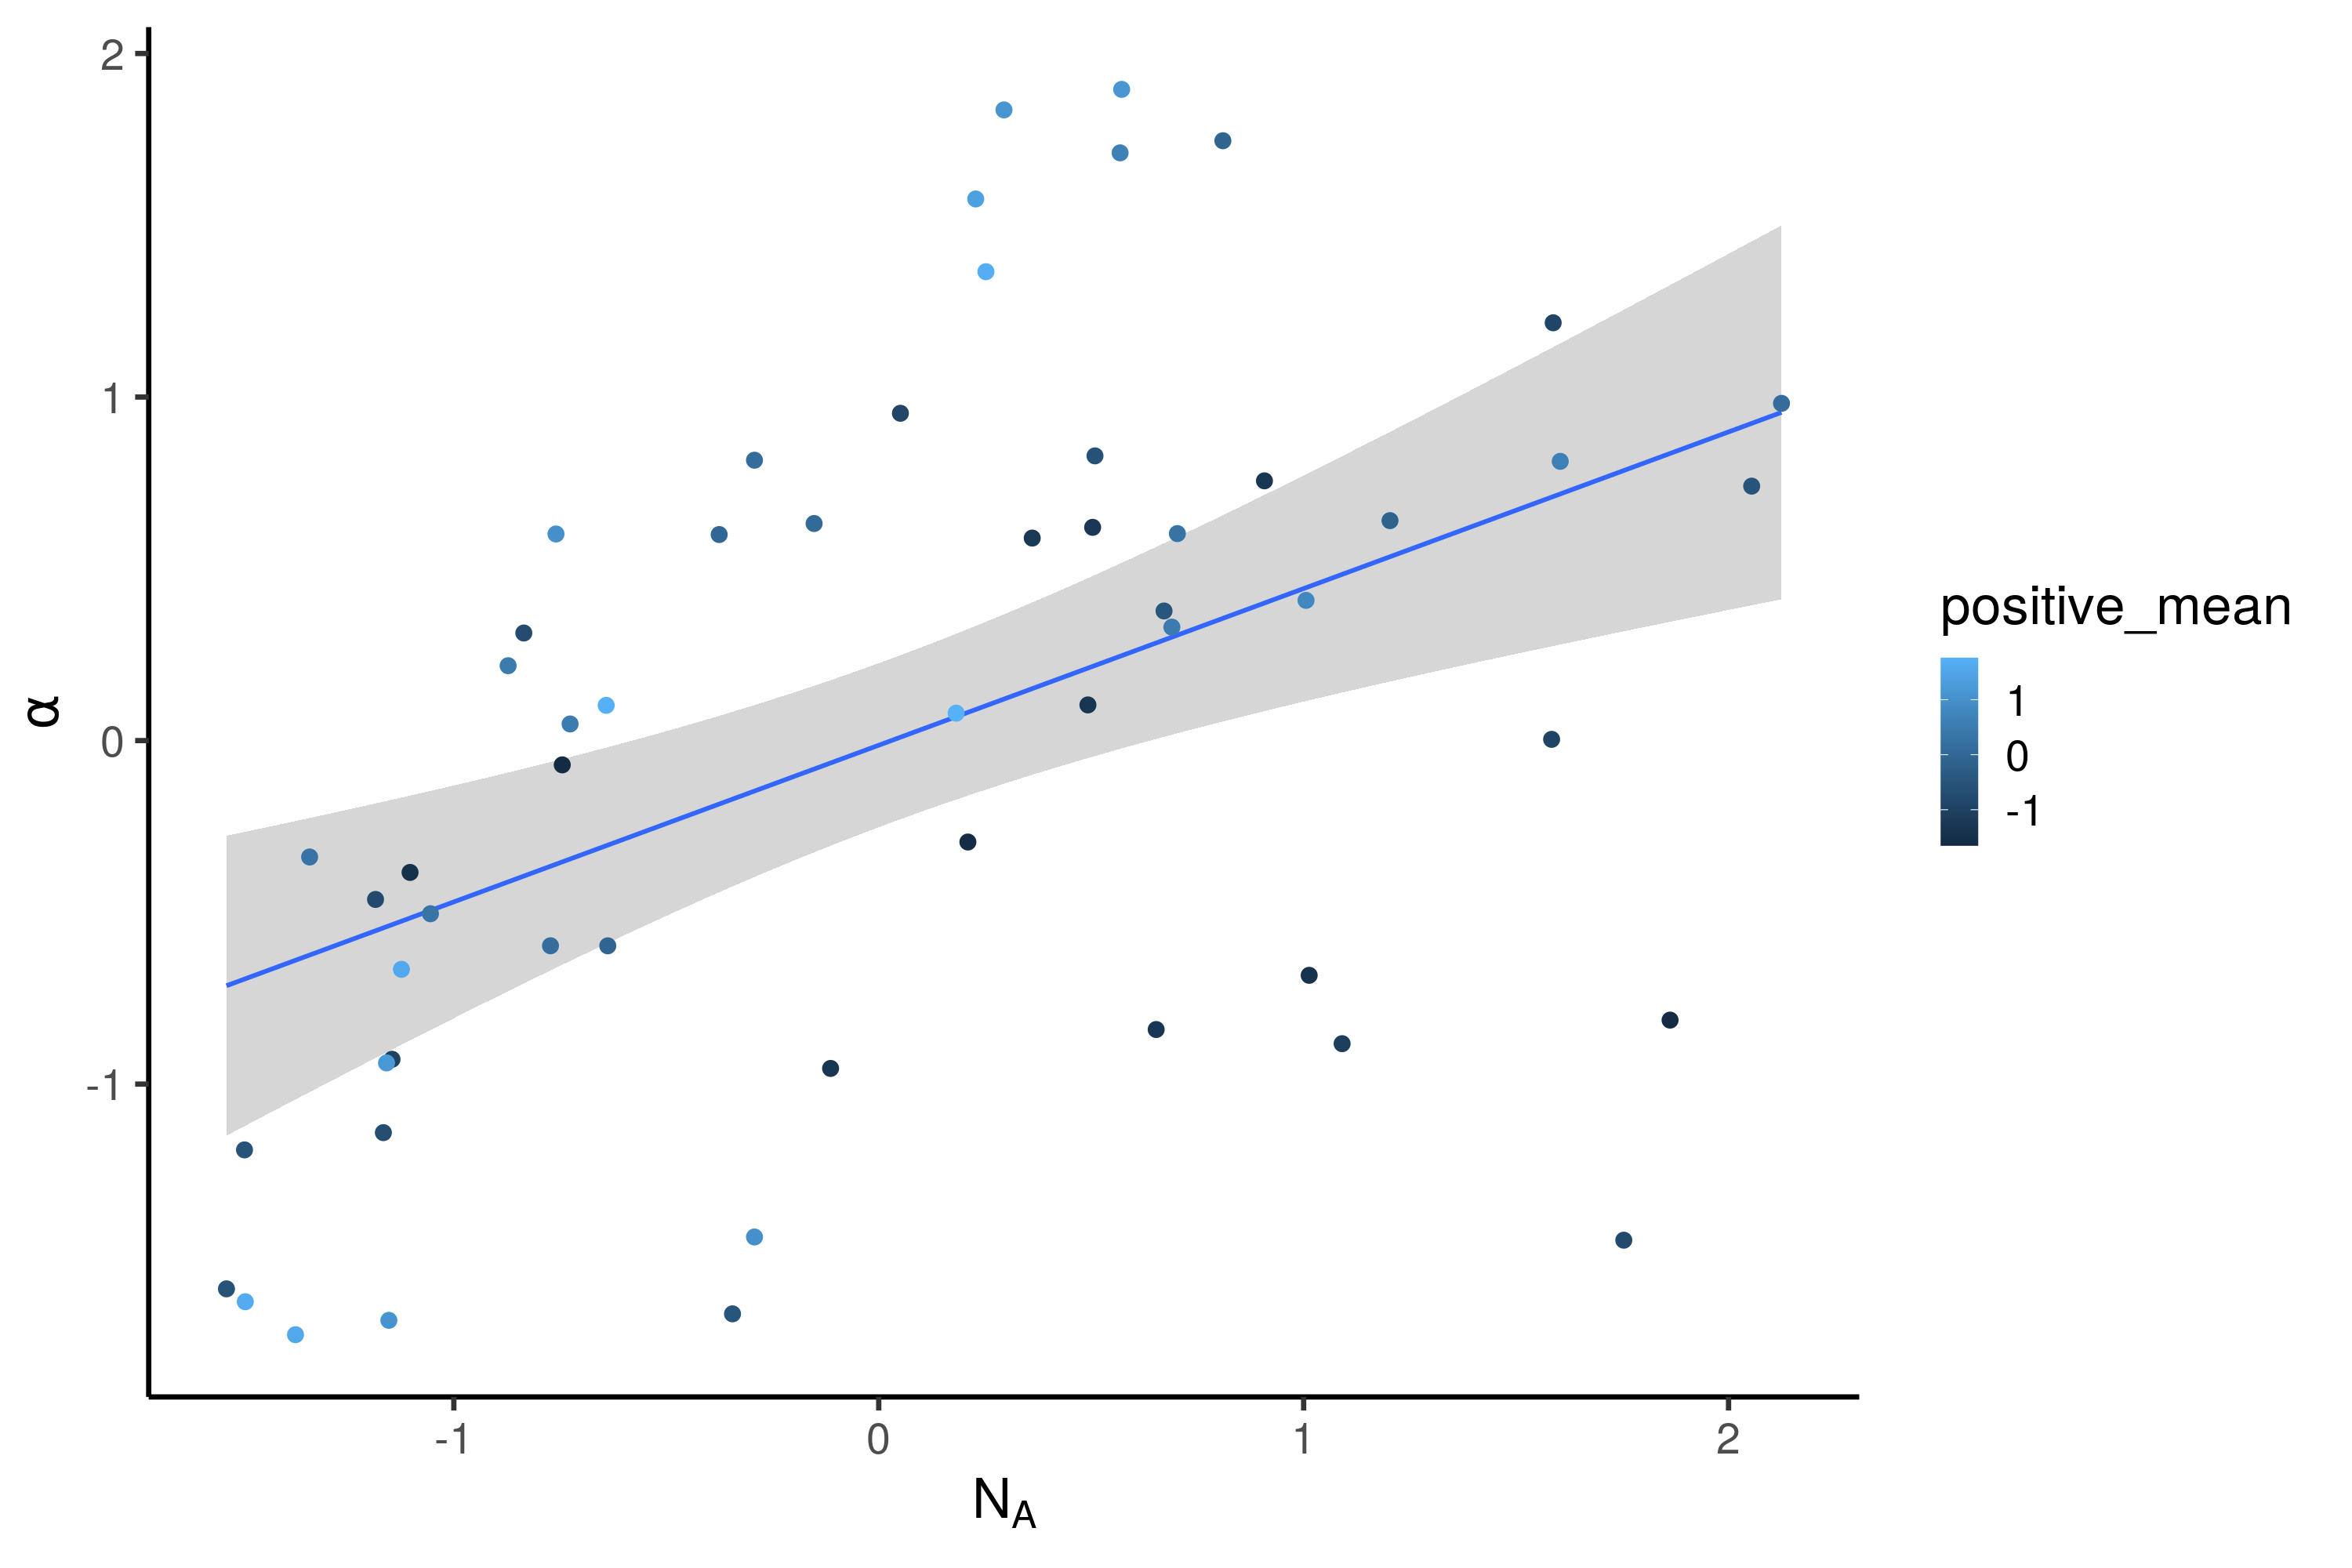


Call:
lm(formula = alpha ~ N_A_resid, data = .)

Coefficients:
(Intercept)    N_A_resid  
    0.03334      0.53328  



	Pearson's product-moment correlation

data:  N_A_resid and dfe_model_df$alpha
t = 2.2807, df = 54, p-value = 0.02654
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03634609 0.51887981
sample estimates:
      cor 
0.2964143 



	Pearson's product-moment correlation

data:  dfe_model_df$N_A and dfe_model_df$alpha
t = 3.9147, df = 54, p-value = 0.0002559
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2365042 0.6524262
sample estimates:
      cor 
0.4701709 


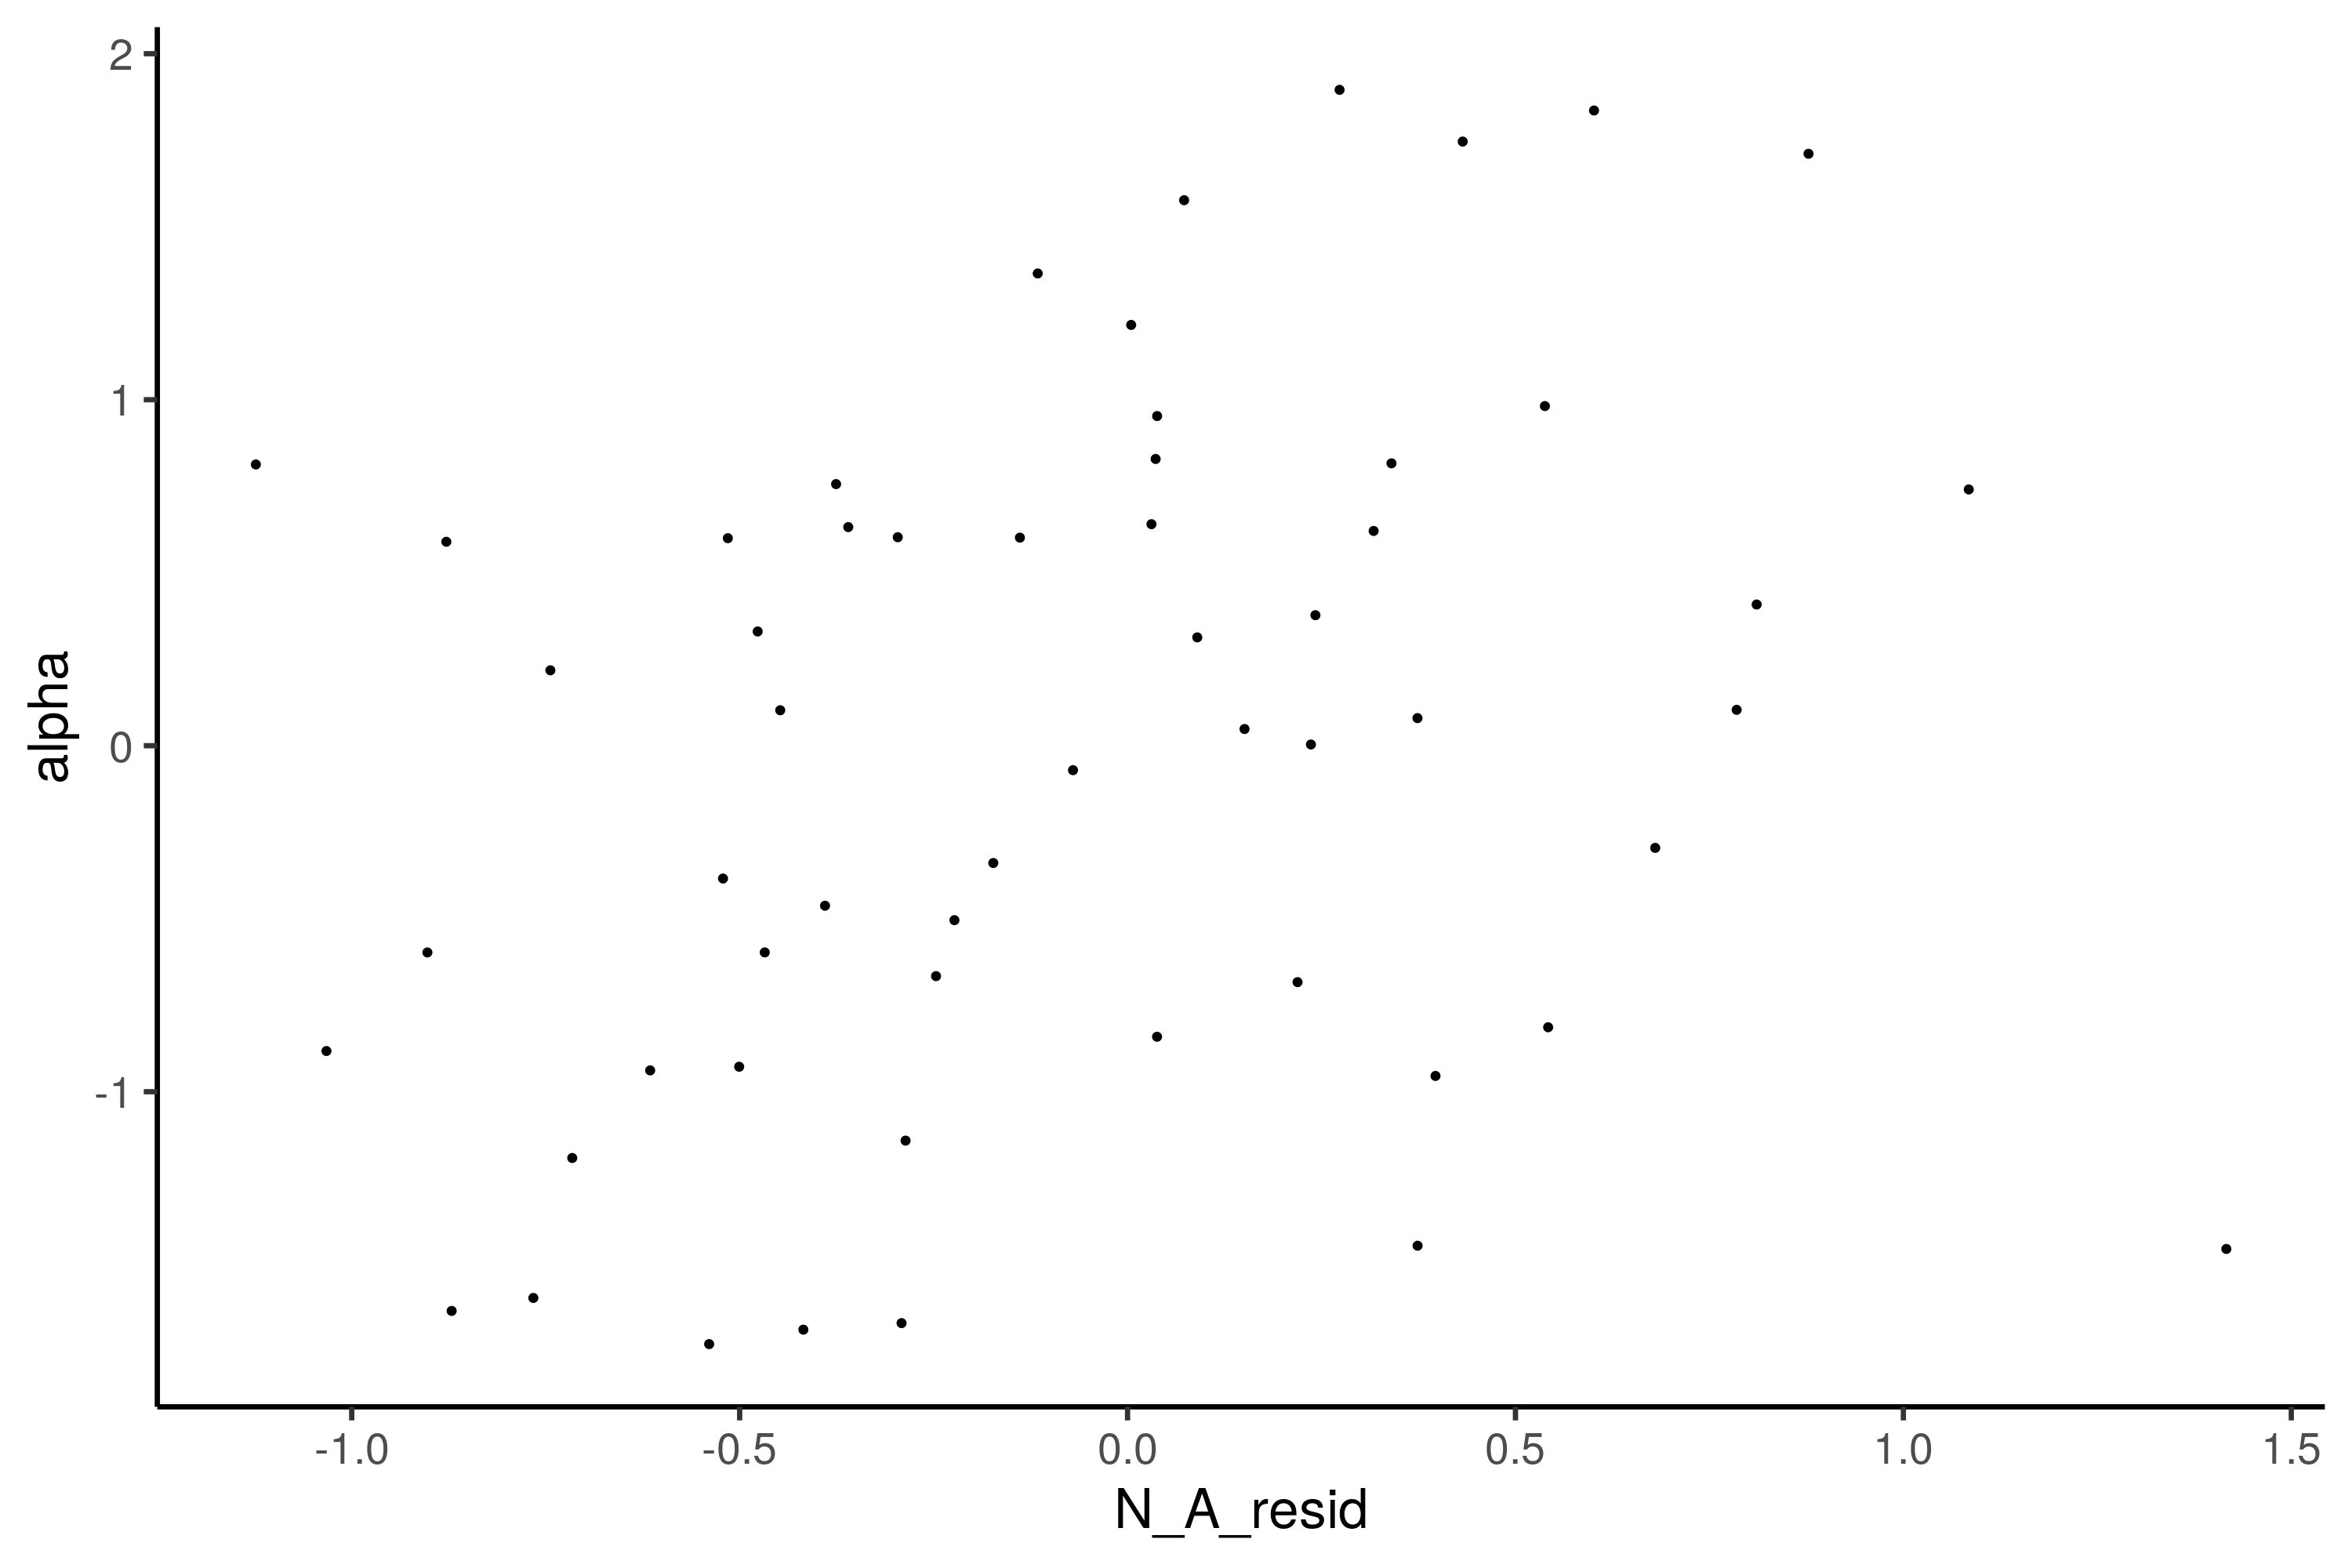

In [73]:
hist(dfe_df$alpha)

dfe_model_df <- 
    dfe_df %>%
    filter(n == 20) %>%    
    mutate_if(is.numeric, scale)


dfe_model_df %>%
    rename(positive_mean = pos_mean) %>% 
    rename(negative_proportion = neg_prop) %>% 
    ggplot(aes(positive_mean*N_A, alpha, colour = positive_mean)) +
    geom_smooth(method = "lm") +
    geom_point(size = 3) +
    xlab(expression(N[A])) +
    ylab(expression(alpha))

head(dfe_model_df)
dfe_model_df %>%
    rename(positive_mean = pos_mean) %>% 
    rename(negative_proportion = neg_prop) %>% 
    ggplot(aes(N_A, alpha, colour = positive_mean)) +
    geom_smooth(method = "lm") +
    geom_point(size = 3) +
    xlab(expression(N[A])) +
    ylab(expression(alpha)) +
    ggsave("../figures/supplement_slim.pdf", width = 15, height = 10)


dfe_model_df %>% 
    lm(alpha ~ N_A + N_B + N_0 + T_B + T_0 + neg_prop + pos_mean + pos_shape + neg_mean + neg_shape, data = .) %>% 
    summary() %>% 
    xtable::xtable(digits = 3, display = c("s", "f", "f", "f", "g")) %>% 
    print()

N_A_resid <- 
    dfe_model_df %>% 
    lm(N_A ~ N_B + N_0 + T_B + T_0 + neg_prop + pos_mean + pos_shape + neg_mean + neg_shape, data = .) %>% 
    residuals

dfe_model_df %>%
    ggplot(aes(N_A_resid, alpha)) +
    geom_point()

dfe_model_df %>% 
    lm(alpha ~ N_A_resid, data = .)

cor.test(N_A_resid ,dfe_model_df$alpha)
cor.test(dfe_model_df$N_A,dfe_model_df$alpha)

`geom_smooth()` using formula 'y ~ x'



% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Wed May 26 09:46:05 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & 48572.546 & 7187.166 & 6.758 & 2.33e-08 \\ 
  N\_A & 8.410 & 1.719 & 4.892 & 1.32e-05 \\ 
  N\_B & 0.992 & 1.059 & 0.937 & 0.354 \\ 
  N\_0 & -2.288 & 0.999 & -2.290 & 0.0268 \\ 
  T\_B & 3.374 & 1.928 & 1.750 & 0.0869 \\ 
  T\_0 & 0.958 & 1.761 & 0.544 & 0.589 \\ 
  neg\_prop & -65840.263 & 7820.469 & -8.419 & 8.53e-11 \\ 
  pos\_mean & 1569796.585 & 185737.617 & 8.452 & 7.66e-11 \\ 
  pos\_shape & -68.742 & 178.900 & -0.384 & 0.703 \\ 
  neg\_mean & -370451.135 & 175239.870 & -2.114 & 0.0401 \\ 
  neg\_shape & -1.390 & 208.406 & -0.007 & 0.995 \\ 
   \hline
\end{tabular}
\end{table}


`geom_smooth()` using formula 'y ~ x'



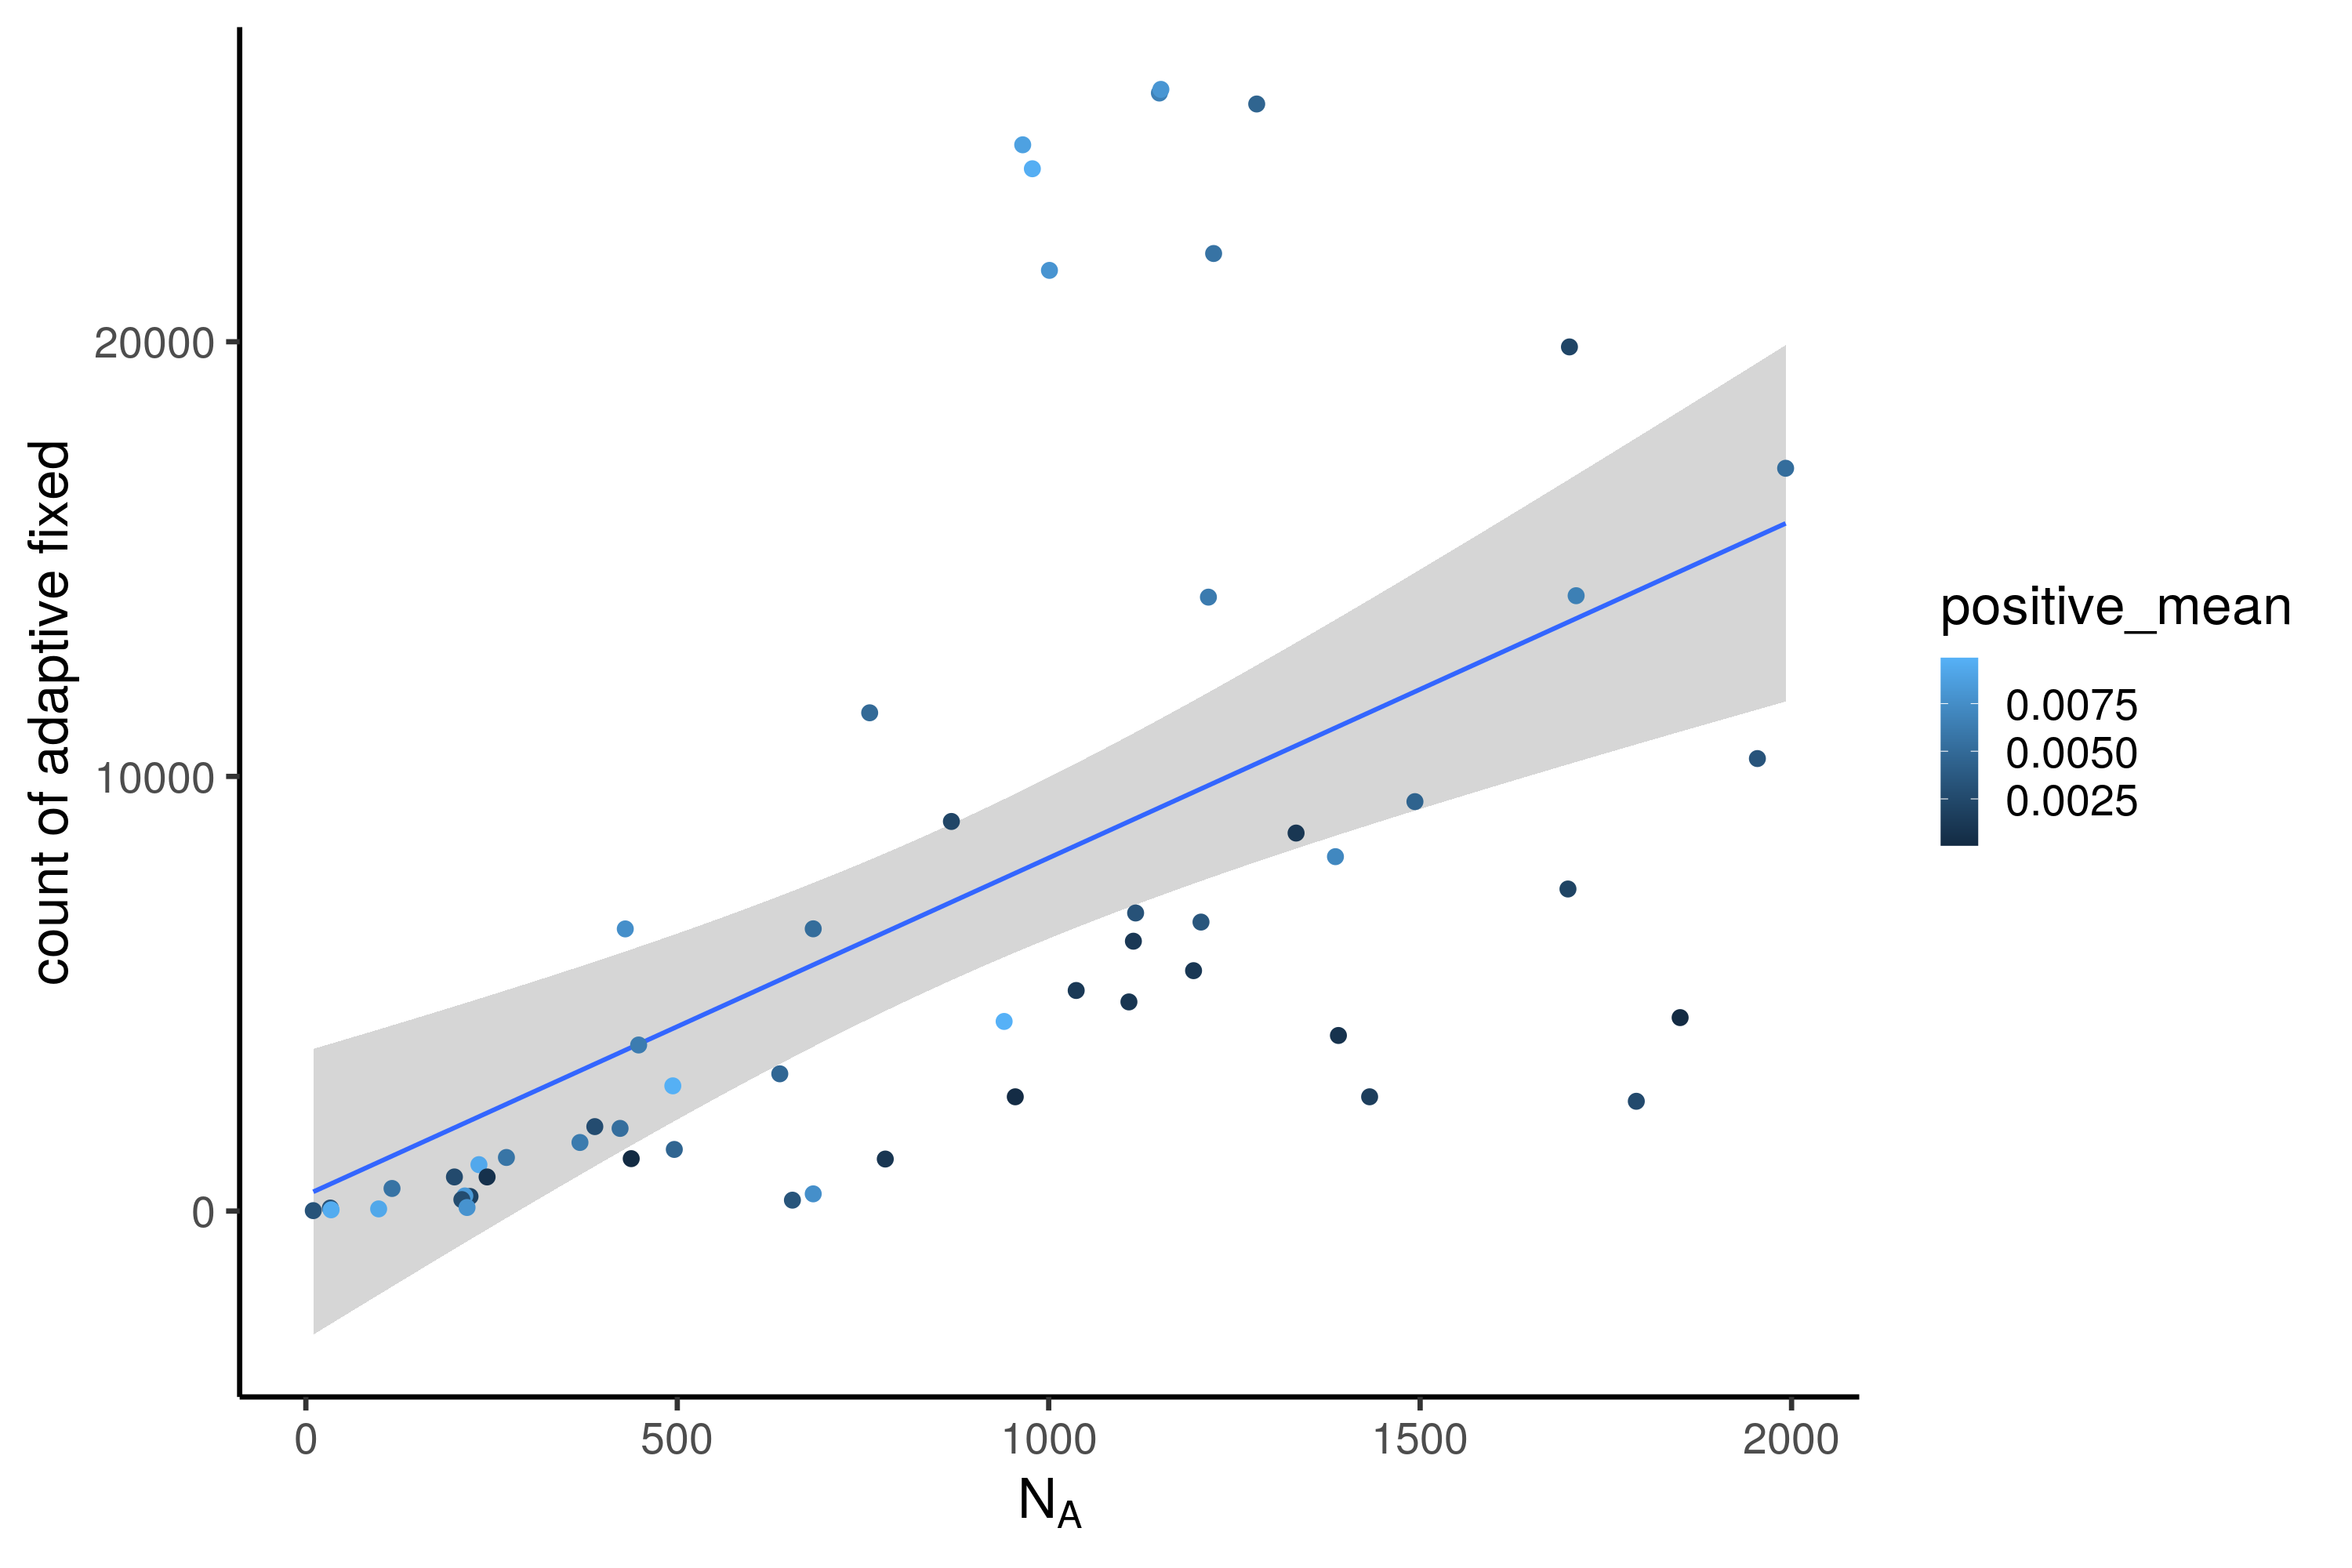


Call:
lm(formula = alpha_count ~ N_A_resid, data = .)

Coefficients:
(Intercept)    N_A_resid  
    7017.79         8.41  



	Pearson's product-moment correlation

data:  N_A_resid and dfe_model_df$alpha_count
t = 2.4109, df = 54, p-value = 0.01934
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05319799 0.53111126
sample estimates:
      cor 
0.3117386 



	Pearson's product-moment correlation

data:  dfe_model_df$N_A and dfe_model_df$alpha_count
t = 4.7891, df = 54, p-value = 1.346e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3305474 0.7073630
sample estimates:
  cor 
0.546 


[1] 10

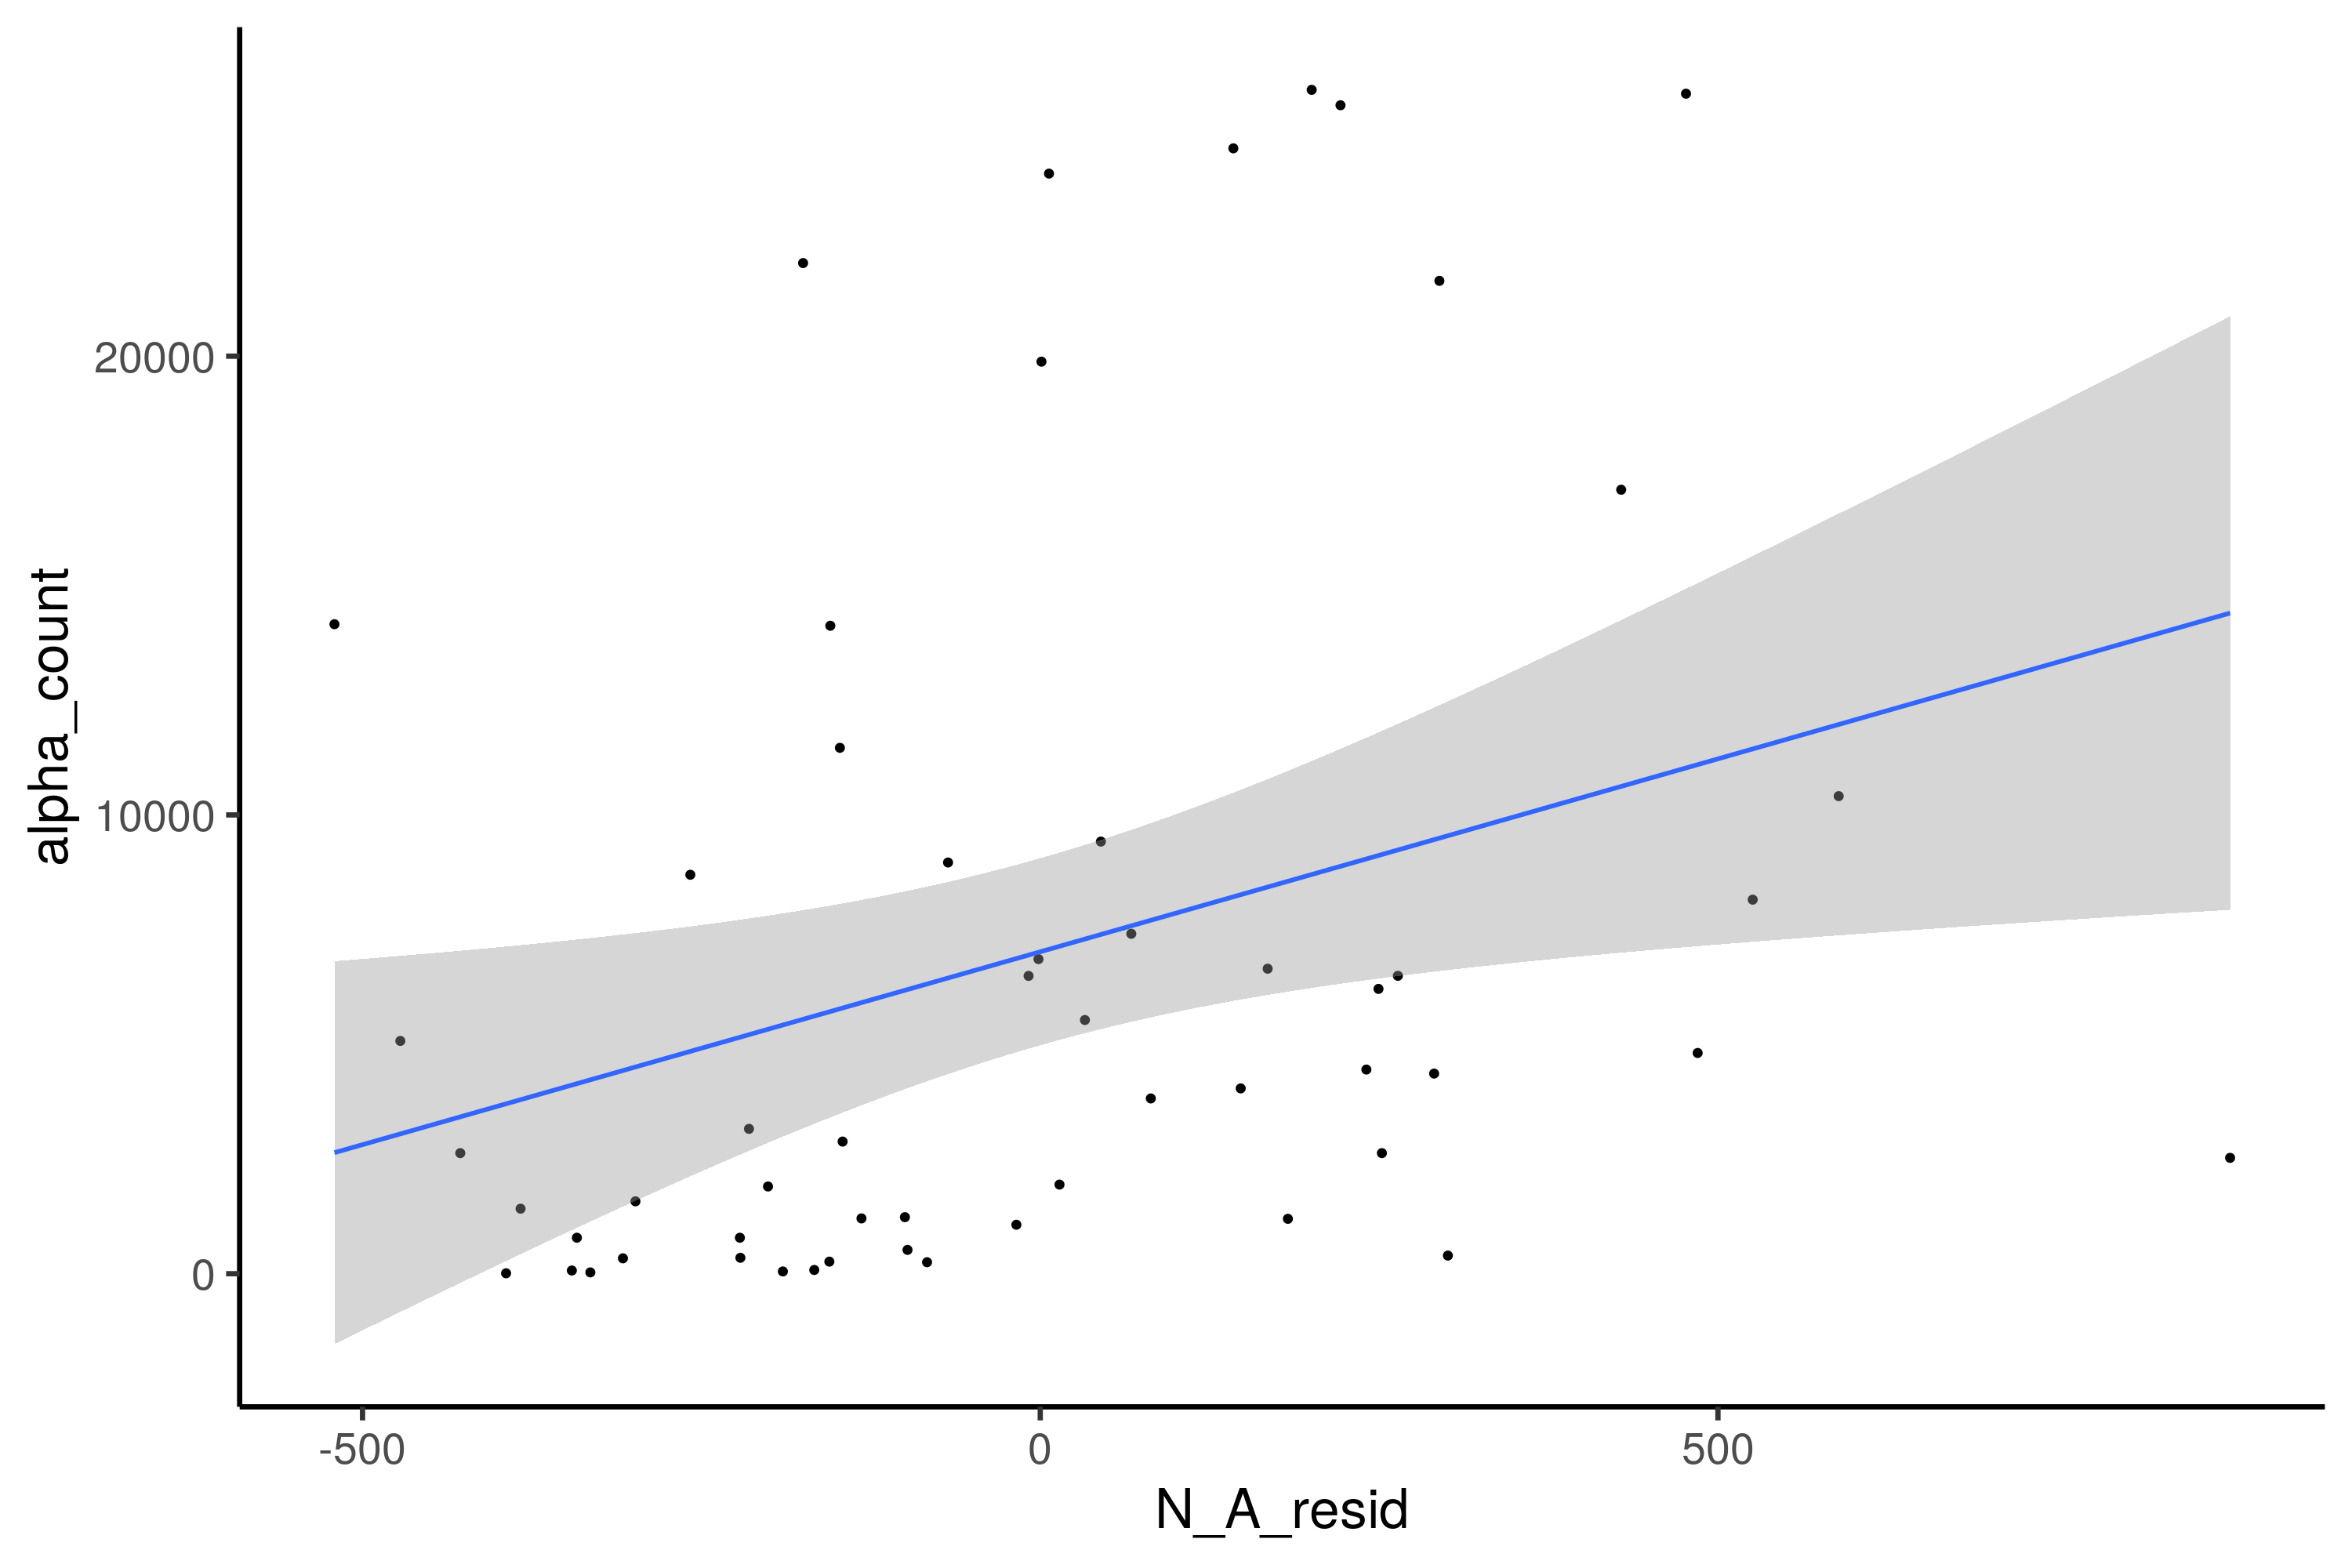

In [86]:

dfe_model_df <- 
    dfe_df %>%
    filter(n == 20) %>%
    mutate(Ns = pos_mean*N_A, alpha_count = fixed*alpha) %>%
    drop_na()
    #mutate_if(is.numeric, scale)


dfe_model_df %>%
    rename(positive_mean = pos_mean) %>% 
    rename(negative_proportion = neg_prop) %>% 
    ggplot(aes(N_A, alpha_count, colour = positive_mean)) +
    geom_smooth(method = "lm") +
    geom_point(size = 3) +
    xlab(expression(paste(N[A]))) +
    ylab("count of adaptive fixed")


dfe_model_df %>% 
    lm(alpha_count ~ N_A + N_B + N_0 + T_B + T_0 + neg_prop + pos_mean + pos_shape + neg_mean + neg_shape, data = .) %>% 
    summary() %>% 
    xtable::xtable(digits = 3, display = c("s", "f", "f", "f", "g")) %>% 
    print()

N_A_resid <- 
    dfe_model_df %>% 
    lm(N_A ~ N_B + N_0 + T_B + T_0 + neg_prop + pos_mean + pos_shape + neg_mean + neg_shape, data = .) %>% 
    residuals


dfe_model_df %>%
    ggplot(aes(N_A_resid, alpha_count)) +
    geom_point() +
    geom_smooth(method = "lm")

dfe_model_df %>% 
    lm(alpha_count ~ N_A_resid, data = .)

cor.test(N_A_resid , dfe_model_df$alpha_count)
cor.test(dfe_model_df$N_A, dfe_model_df$alpha_count)


min(dfe_df$N_A)

`geom_smooth()` using formula 'y ~ x'



% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Wed May 26 09:46:44 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & 86952.561 & 6808.407 & 12.771 & 0.000217 \\ 
  N\_A & 10.979 & 3.468 & 3.166 & 0.034 \\ 
  N\_B & 0.344 & 1.236 & 0.278 & 0.795 \\ 
  N\_0 & -1.712 & 1.170 & -1.463 & 0.217 \\ 
  T\_B & 2.733 & 1.786 & 1.530 & 0.201 \\ 
  T\_0 & -0.386 & 1.724 & -0.224 & 0.834 \\ 
  neg\_prop & -104122.344 & 6646.843 & -15.665 & 9.7e-05 \\ 
  pos\_mean & 1370434.660 & 414689.411 & 3.305 & 0.0298 \\ 
  pos\_shape & -12.431 & 207.587 & -0.060 & 0.955 \\ 
  neg\_mean & 363849.620 & 220418.112 & 1.651 & 0.174 \\ 
  neg\_shape & 264.821 & 219.603 & 1.206 & 0.294 \\ 
   \hline
\end{tabular}
\end{table}


`geom_smooth()` using formula 'y ~ x'



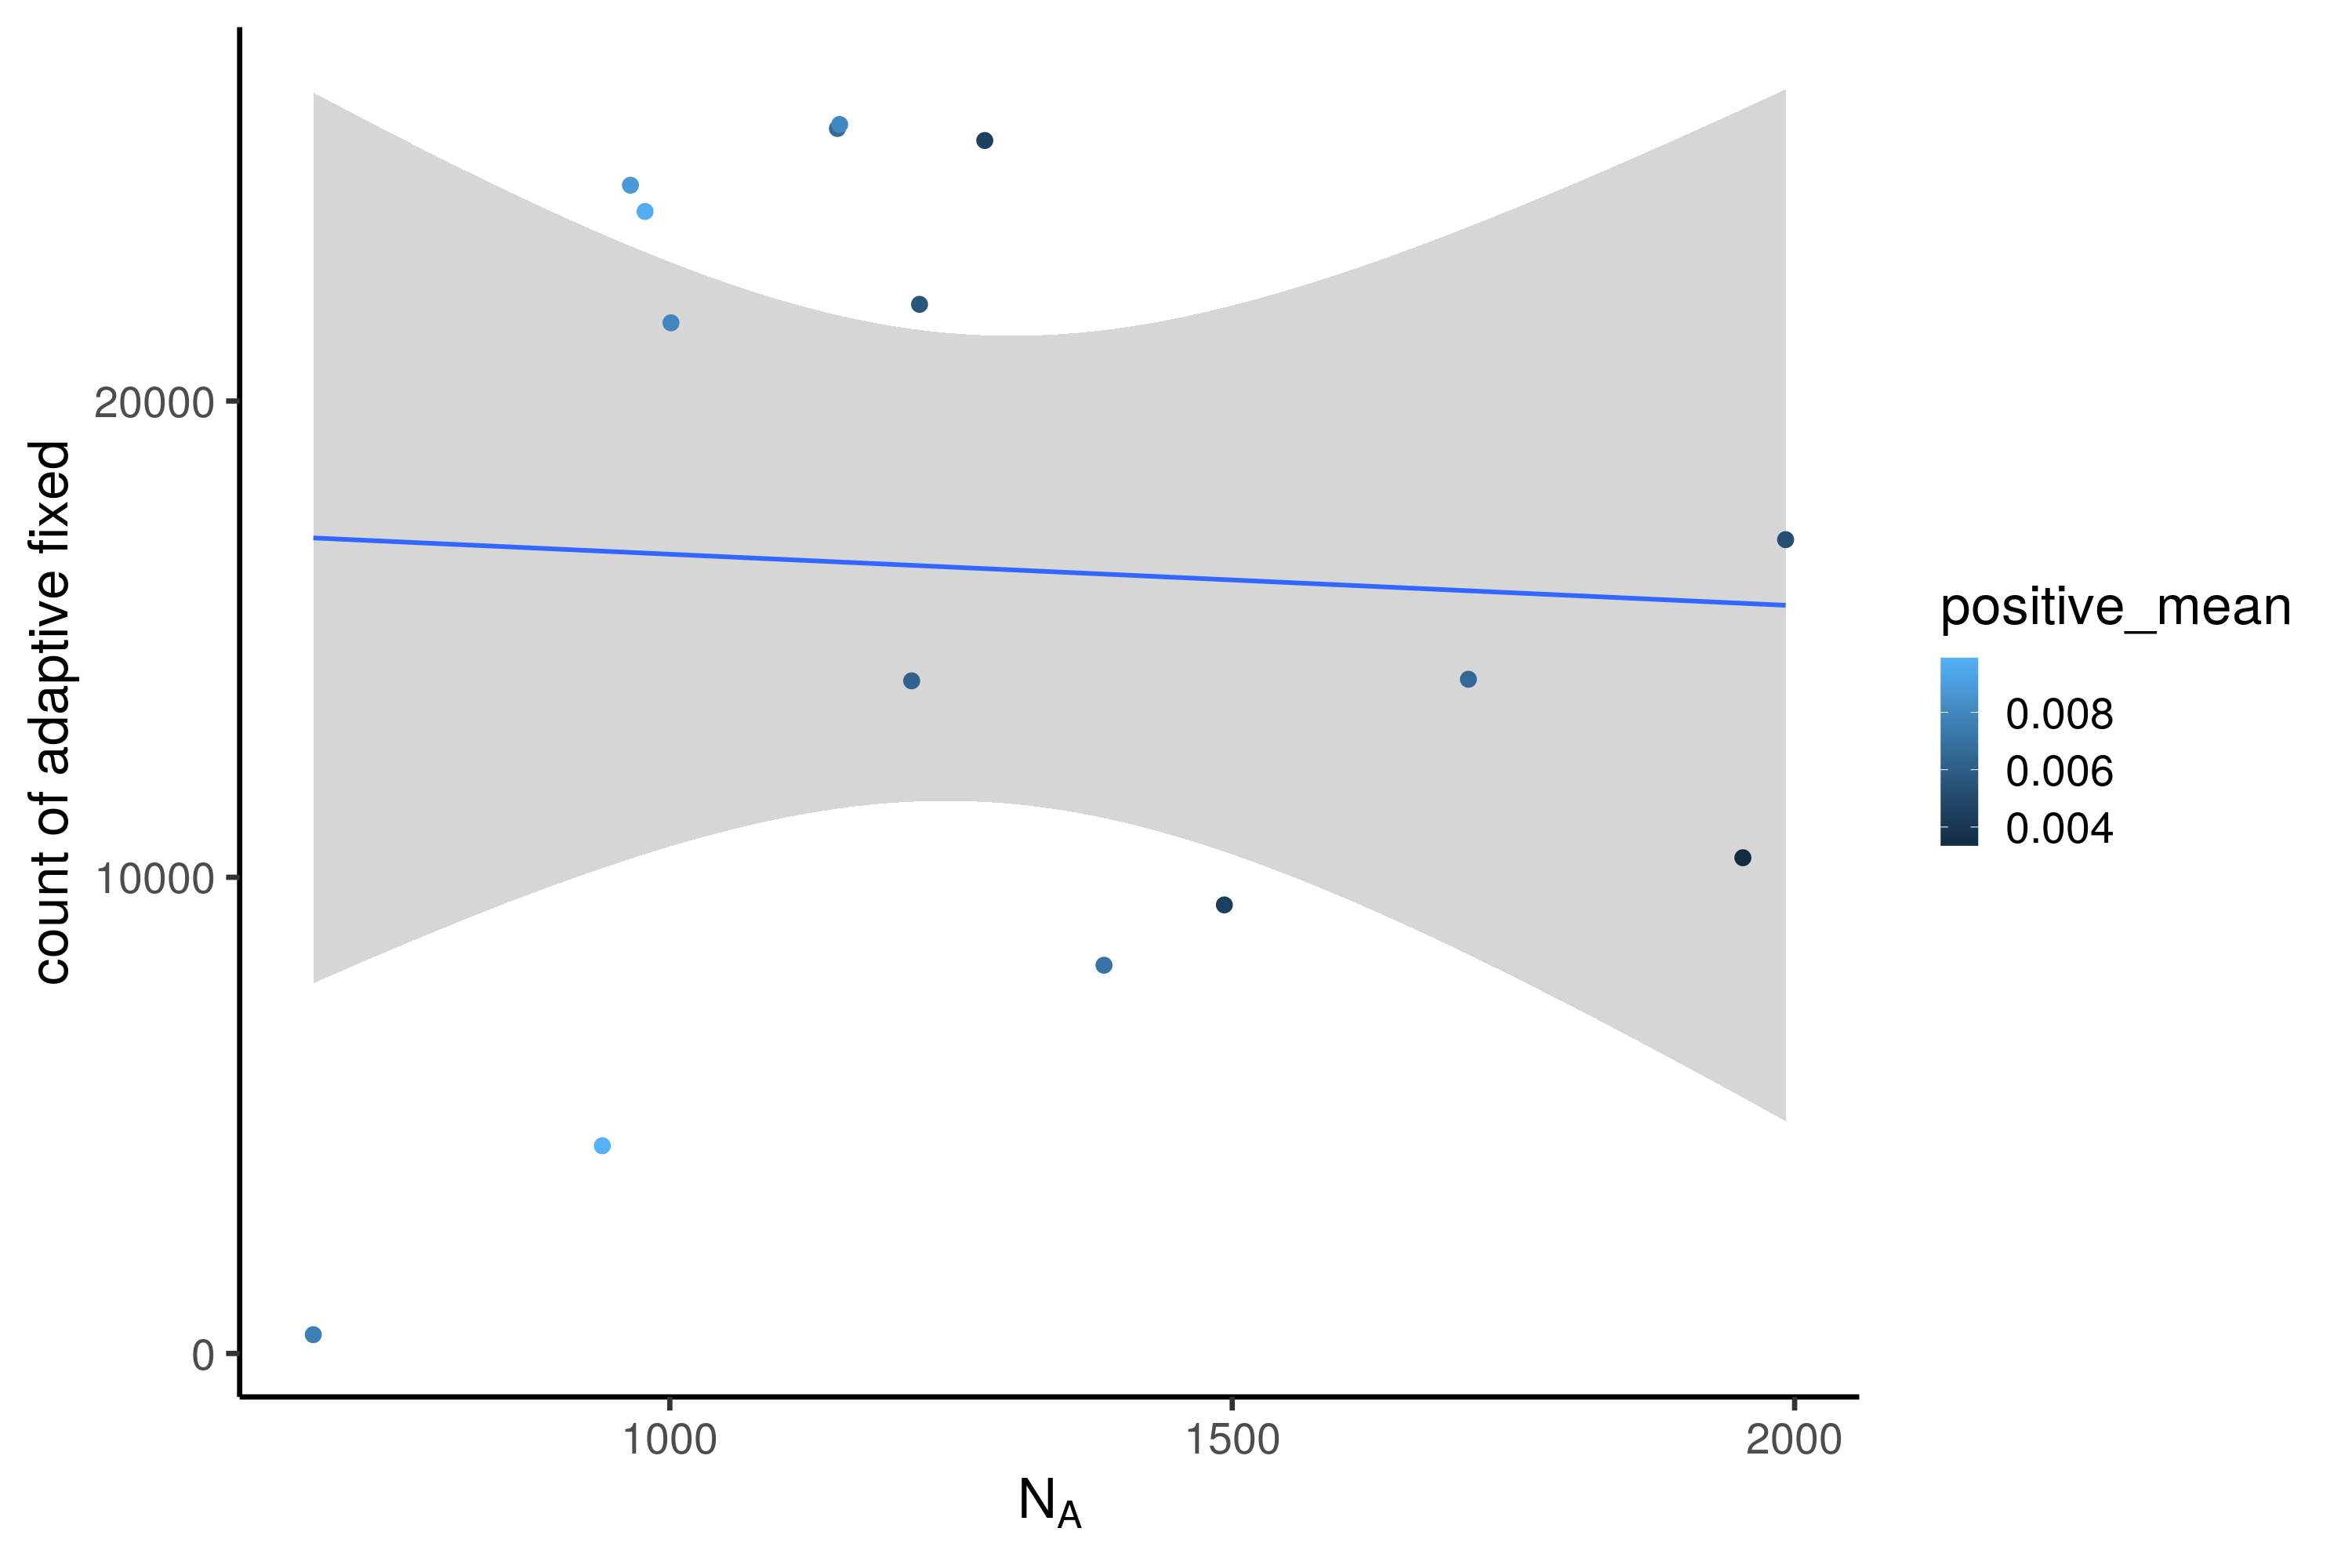


Call:
lm(formula = alpha_count ~ N_A_resid, data = .)

Coefficients:
(Intercept)    N_A_resid  
   16486.00        10.98  



	Pearson's product-moment correlation

data:  N_A_resid and dfe_model_df$alpha_count
t = 0.56708, df = 13, p-value = 0.5803
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3877543  0.6184132
sample estimates:
    cor 
0.15537 



	Pearson's product-moment correlation

data:  dfe_model_df$N_A and dfe_model_df$alpha_count
t = -0.17331, df = 13, p-value = 0.8651
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5468268  0.4759558
sample estimates:
       cor 
-0.0480134 


[1] 10

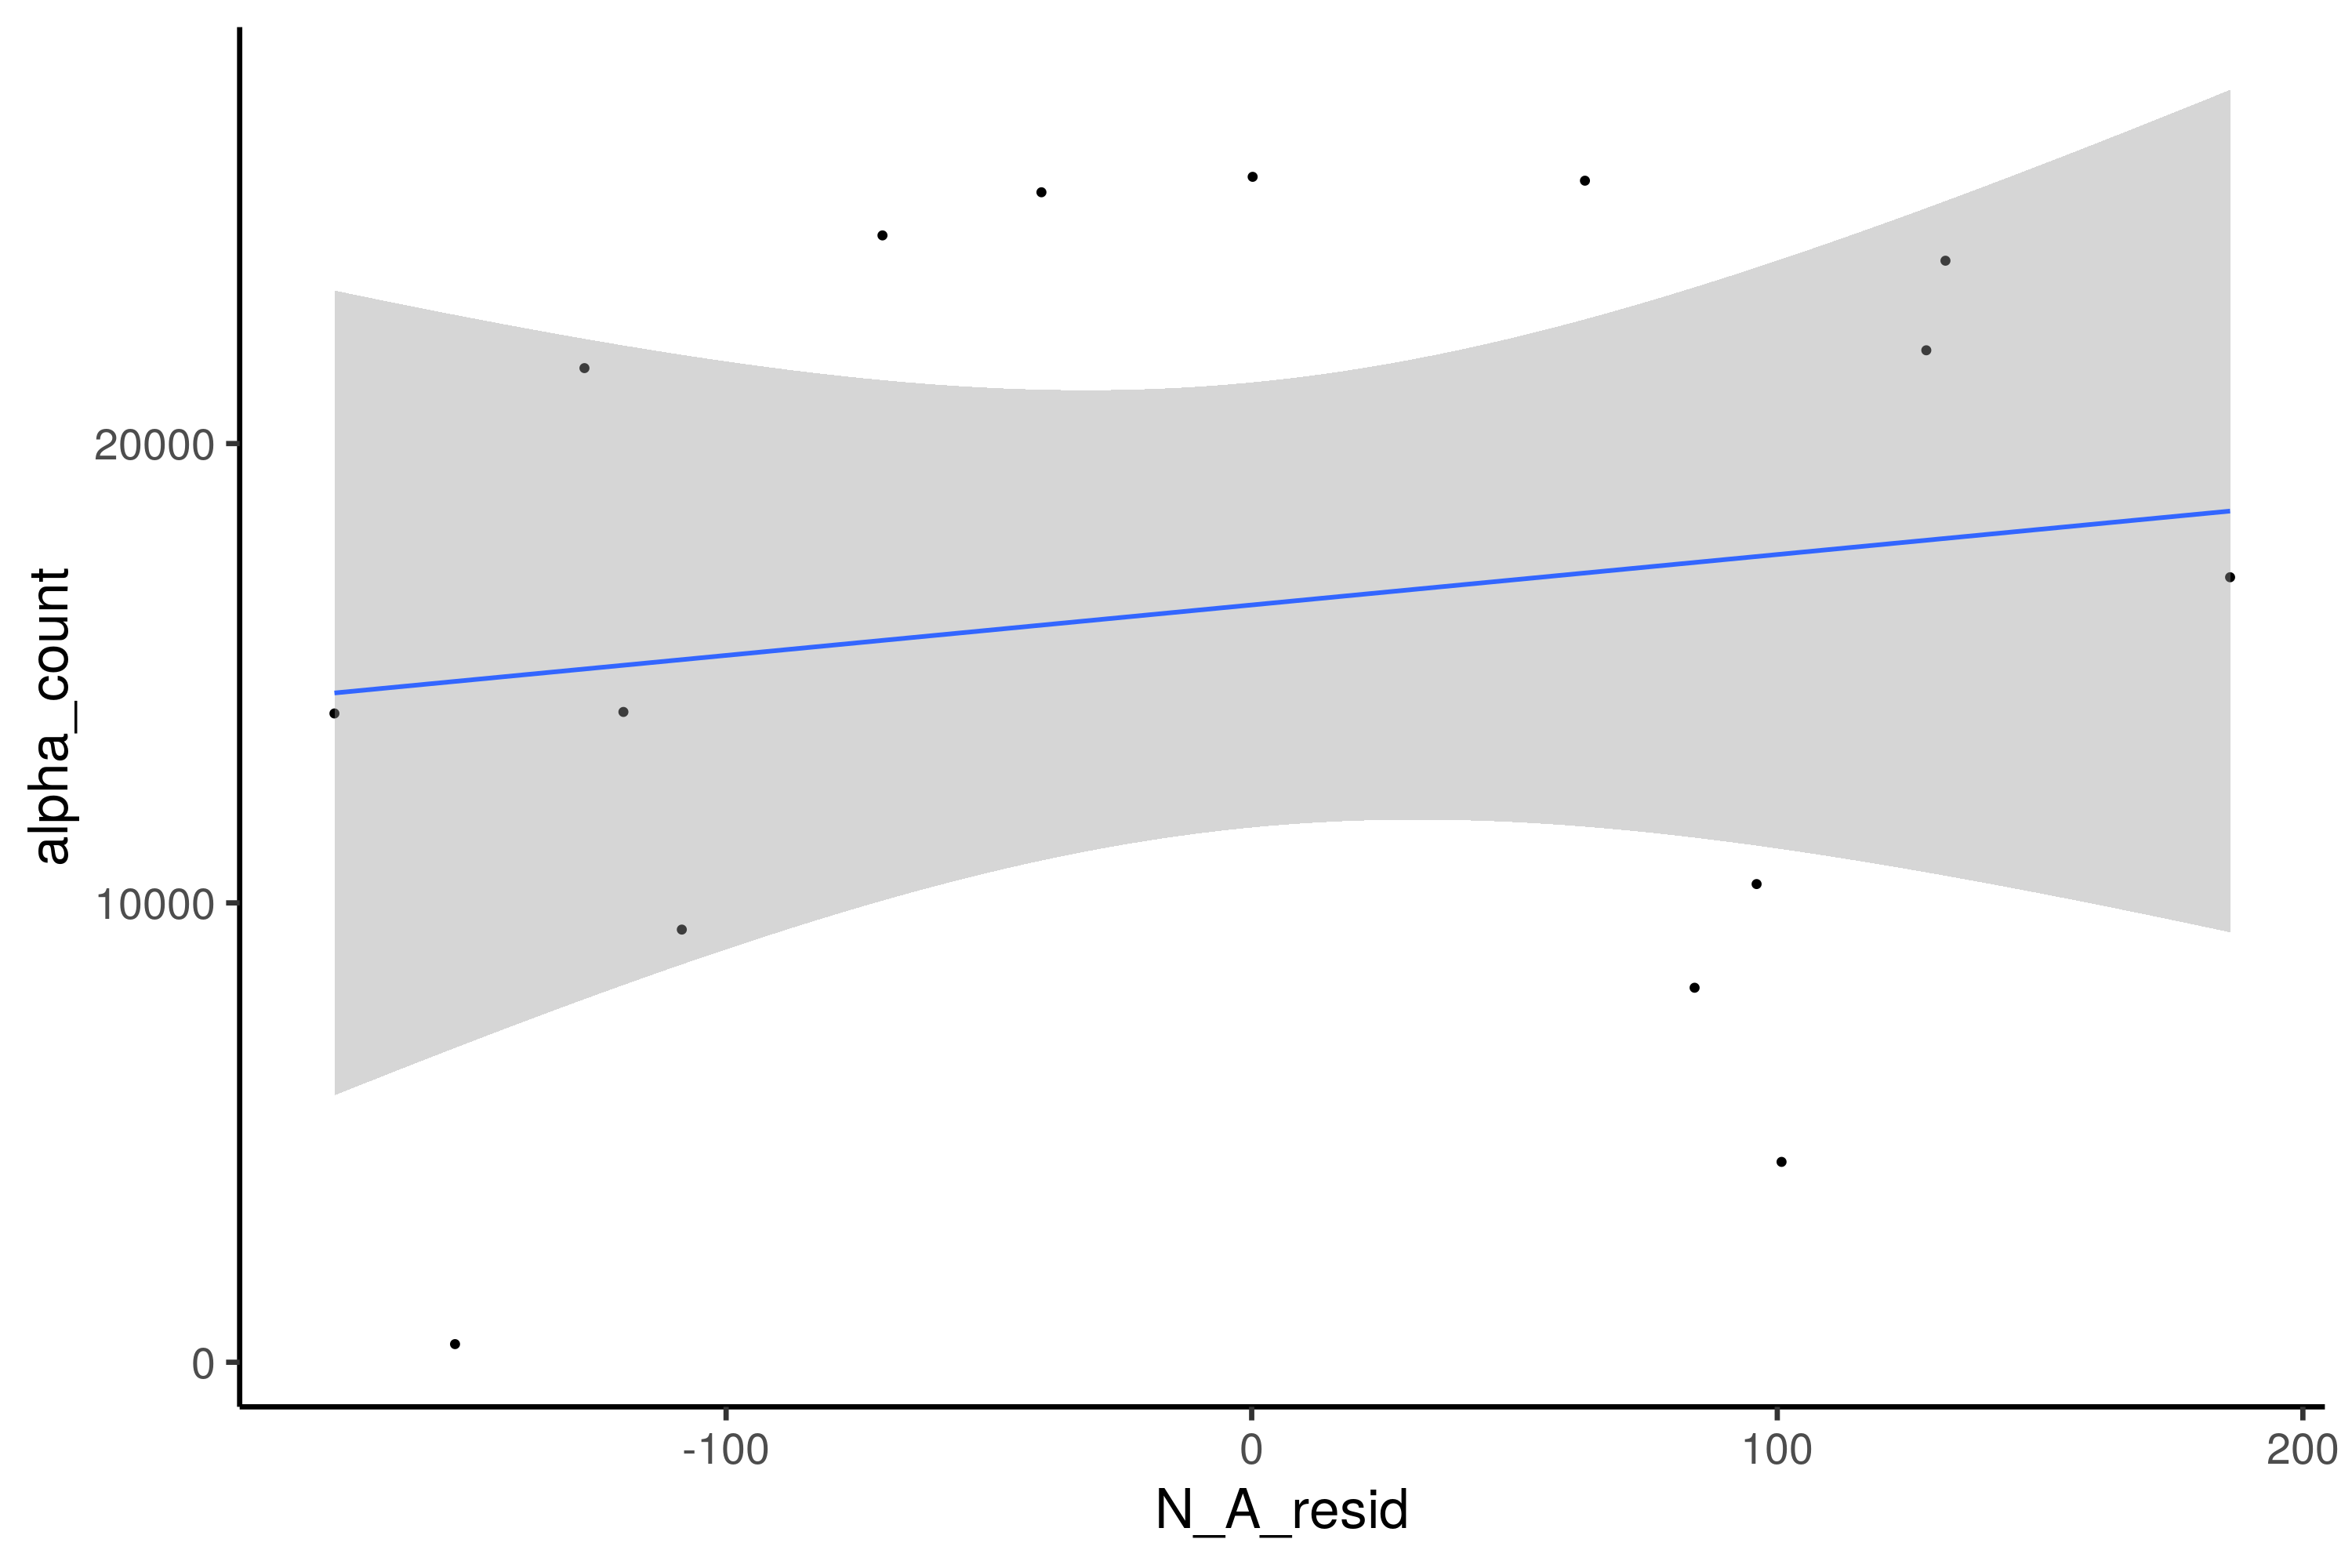

In [87]:

dfe_model_df <- 
    dfe_df %>%
    filter(n == 20) %>%
    mutate(Ns = pos_mean*N_A, alpha_count = fixed*alpha) %>%
    filter(Ns > 5) %>% 
    drop_na()
    #mutate_if(is.numeric, scale)


dfe_model_df %>%
    rename(positive_mean = pos_mean) %>% 
    rename(negative_proportion = neg_prop) %>% 
    ggplot(aes(N_A, alpha_count, colour = positive_mean)) +
    geom_smooth(method = "lm") +
    geom_point(size = 3) +
    xlab(expression(paste(N[A]))) +
    ylab("count of adaptive fixed")


dfe_model_df %>% 
    lm(alpha_count ~ N_A + N_B + N_0 + T_B + T_0 + neg_prop + pos_mean + pos_shape + neg_mean + neg_shape, data = .) %>% 
    summary() %>% 
    xtable::xtable(digits = 3, display = c("s", "f", "f", "f", "g")) %>% 
    print()

N_A_resid <- 
    dfe_model_df %>% 
    lm(N_A ~ N_B + N_0 + T_B + T_0 + neg_prop + pos_mean + pos_shape + neg_mean + neg_shape, data = .) %>% 
    residuals


dfe_model_df %>%
    ggplot(aes(N_A_resid, alpha_count)) +
    geom_point() +
    geom_smooth(method = "lm")

dfe_model_df %>% 
    lm(alpha_count ~ N_A_resid, data = .)

cor.test(N_A_resid , dfe_model_df$alpha_count)
cor.test(dfe_model_df$N_A, dfe_model_df$alpha_count)


min(dfe_df$N_A)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      2.776        4.520  



Call:
lm(formula = y ~ x, data = filter(df, x > quantile(x, 0.8)))

Coefficients:
(Intercept)            x  
     -49.24        10.15  


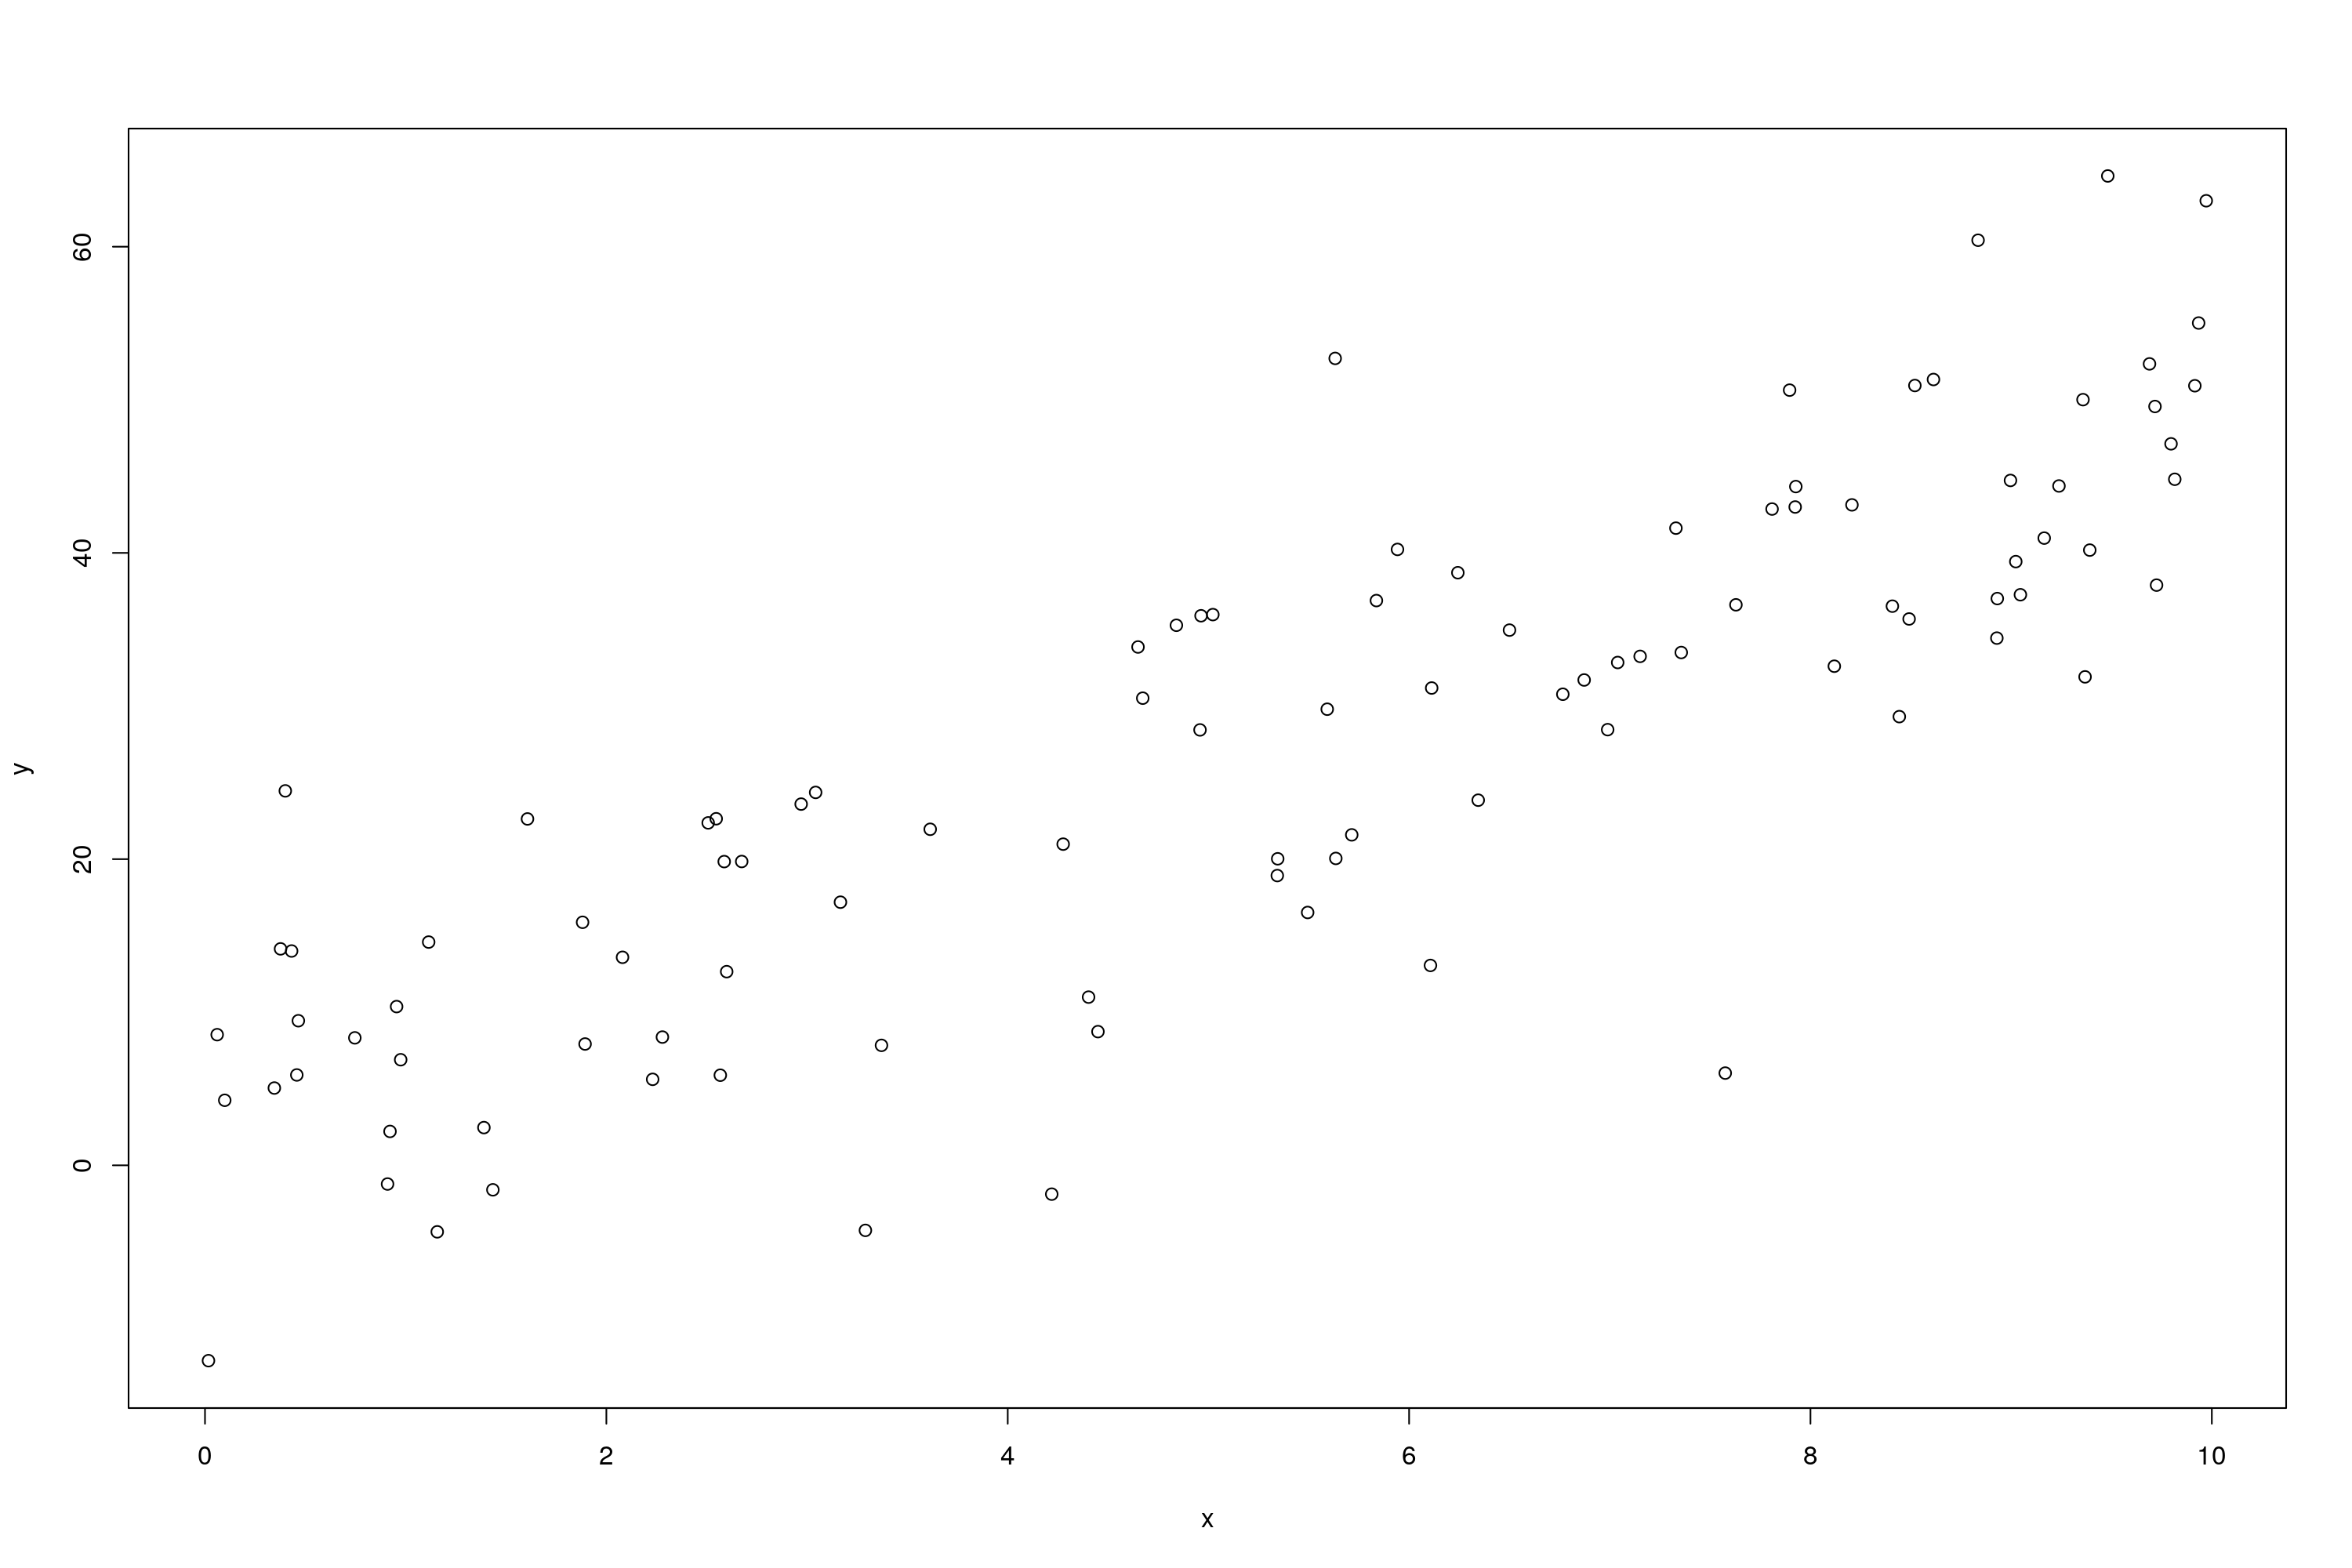

In [119]:
x <- runif(100, 0, 10)
y <- 5*x + rnorm(100, sd = 10)
df <- tibble(x, y)
plot(df)
lm(y ~ x)
lm(y ~ x, filter(df, x > quantile(x, 0.8)))